# EasyVisa Project | Trisha Flores

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Questions to be answered:

* Which features have a high influence on certified (build a profile on results from ML based solution)
* Build a profile on results from ML based solution for certified and denied applicants


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Contents

* Importing of libraries and data
* Data Overview
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* EDA post data processing
* Building bagging and boosting models
* Will tuning the hyperparameters improve the model performance?
* Model Performance Evaluation
* Model Performance Comparision Conclusions
* Actionable Insights and Recommendations

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To perform statistical analysis
import scipy.stats as stats
import statsmodels.api as sm

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
# Import csv of data
visa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# Copy it over to another variable to maintain a clean version of the data
df = visa.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [4]:
# Print the shape of the cell phone data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 25480 rows and 12 columns.


<IPython.core.display.Javascript object>

In [5]:
# Use head to take a look at the first 5 rows to get an idea of what the data looks like
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

* No apparent missing values in the first rows
* Mostly categorical variables
* Case_id will (most likely) not be a valuable column as it has no meaning other than a unique id for each row
* Dependent variable is case_status - It's going to need to be 0 or 1
* I don't like the unit of wage column, it would be better if wages were in the same units
* Next will check a random sample to see if there are any missing values

In [6]:
# Set random seed to get the same random sample each time then look at 10 random samples
np.random.seed(1)
df.sample(n=10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


<IPython.core.display.Javascript object>

* Still no apparent missing values, that's a good sign

In [7]:
# Get detailed info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* Almost all object columns (as expected)
* Another indication of no missing values
* Will have to convert all the objects to categories

In [8]:
# Verifying columns don't have missing values
df.isnull().sum().sort_values(ascending=False)

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Add categorical variables into a list to loop through and change to category type
cat_vars = [
    "case_id",
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
    "case_status",
]

for colname in cat_vars:
    df[colname] = df[colname].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

In [10]:
# Get the number of unique values in each column
df.nunique().sort_values(ascending=False)

case_id                  25480
prevailing_wage          25454
no_of_employees           7105
yr_of_estab                199
continent                    6
region_of_employment         5
education_of_employee        4
unit_of_wage                 4
has_job_experience           2
requires_job_training        2
full_time_position           2
case_status                  2
dtype: int64

<IPython.core.display.Javascript object>

* case_id is all unique values, does not add value to data (will drop)

In [11]:
# Dropping two columns from the dataframe
df.drop(columns=["case_id"], inplace=True)

<IPython.core.display.Javascript object>

In [12]:
# I'm interested in the break up of case status since that's the dependent variable
df["case_status"].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

* 33% of the data is denied
* 66% of applicants were certified

In [13]:
# Let's check for duplicate data
df[df.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* No duplicate values!

In [14]:
# Get summary stats of ALL the variables
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* Highest frequency of applicants are from Asia
* Highest frequency of applicants have job experience and do not need training
* Prevailing wage has different units; so can't trust the metrics til that is fixed (4 units of wage)
* Highest frequency of unit of wage is year, 90%; makes sense to convert the other units to year
* Yr of estb has a large range from 1800 to 2016
* This verifies the id column was successfully dropped
* Full time position is predominantly yes, 90%
* Highest region is Northeast but percentage is only 28%
* No of employees has -26 as min, that flags as an incorrect value; will need to fix in the data processing
* Very large range in no of employees with high std deviation
* Also very large range/st deviation in prevailing wage

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Additional Insight Questions**:

6. Do longer established companies have people being certified more compared to newer established companies?

7. Which region do most certified applicants prefer?

8. Does prevailing wage differ based on region of employment? 

9. How does the job experience vary across different continents? Need for job training?

10. How does the education vary across different continents?

11. What percentage of applicants get certified?

In [15]:
# First define boxplot/histogram and bargraph graphics that are well used in class and projects for EDA univariate analysis
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [16]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=13,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Univariate Analysis

11. What percentage of applicants get certified?

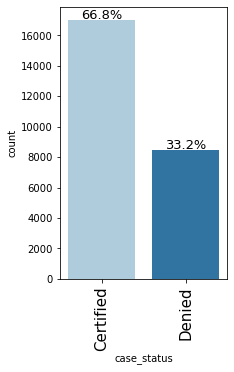

<IPython.core.display.Javascript object>

In [17]:
# First want to visualize the planned predicted variable
labeled_barplot(df, "case_status", perc=True)
# plt.savefig("CaseStatusBar.jpg", bbox_inches="tight")

* 2/3 of applicants end up getting certified
* While 1/3 get denied
* Will be important to try and develop of profile of both

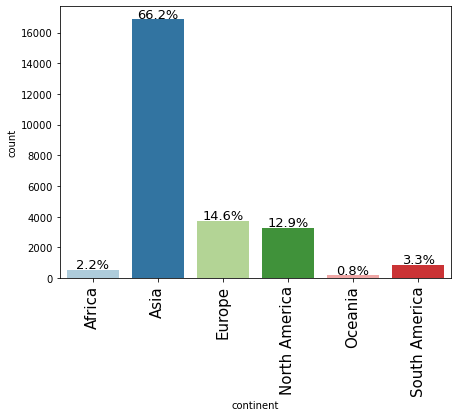

<IPython.core.display.Javascript object>

In [18]:
# Now need to visualize the rest of the variables
labeled_barplot(df, "continent", perc=True)
# plt.savefig("ContinentBar.jpg", bbox_inches="tight")

* 66% of applicants are from Asia
* The next highest is Europe at 14.6%
* Followed by North America as 12.9%
* The rest of the continents make up the remaining percentage of 6.3%

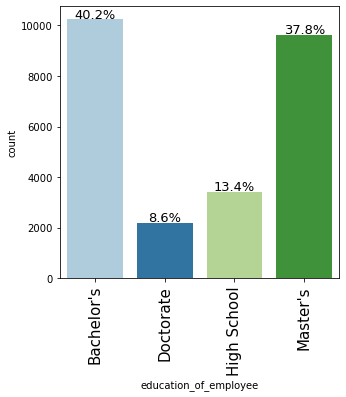

<IPython.core.display.Javascript object>

In [19]:
# Visualize the variable
labeled_barplot(df, "education_of_employee", perc=True)
# plt.savefig("EducationBar.jpg", bbox_inches="tight")

* Only 13.4% of applicants do not have a post HS education | predominantly higher education in applicants
* Highest is Bachelor's followed by Master's
* Lowest education is Doctorate

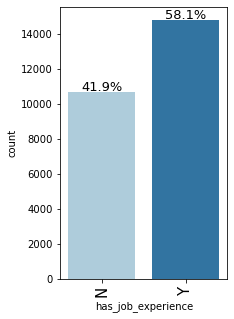

<IPython.core.display.Javascript object>

In [20]:
# Visualize the variable
labeled_barplot(df, "has_job_experience", perc=True)
# plt.savefig("JobExpBar.jpg", bbox_inches="tight")

* Nearly an even split with job experience, 58.1% yes and 41.9% no

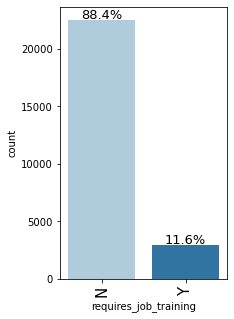

<IPython.core.display.Javascript object>

In [21]:
# Visualize the variable
labeled_barplot(df, "requires_job_training", perc=True)
# plt.savefig("ReqJobTrainBar.jpg", bbox_inches="tight")

* Suspected requires job training to match the job experience percentages
* Surprised to see the difference
* 88.4% of applicants do not need job training (though 41.9% don't have job experience)
* And 11.6% require job training

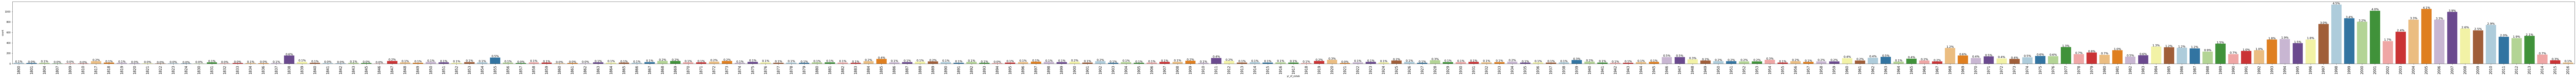

<IPython.core.display.Javascript object>

In [22]:
# Visualize the variable
labeled_barplot(df, "yr_of_estab", perc=True)
# plt.savefig("YrEstBar.jpg", bbox_inches="tight")

* Based on the number of unique years, can't make much out on this plot
* Except there are higher frequencies in the later years

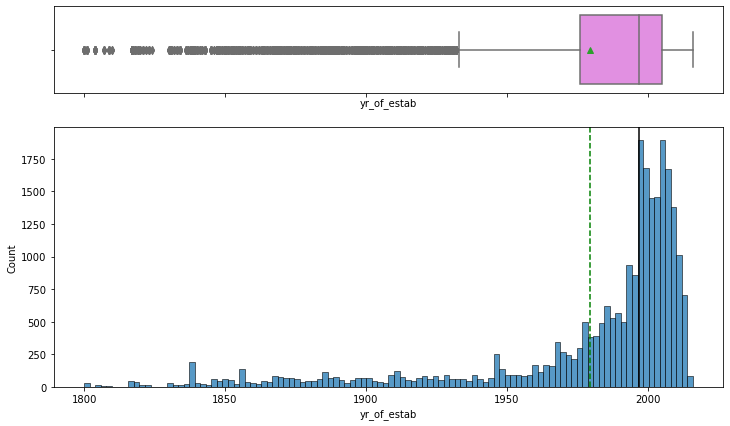

<IPython.core.display.Javascript object>

In [23]:
# Let's try the histogram and boxplot to try and gain some univariate insight
histogram_boxplot(df, "yr_of_estab")

* Most of the companies (applicants work for) were established after 2000
* Median is right below 2000 and mean is not at the same time (strong left skew)

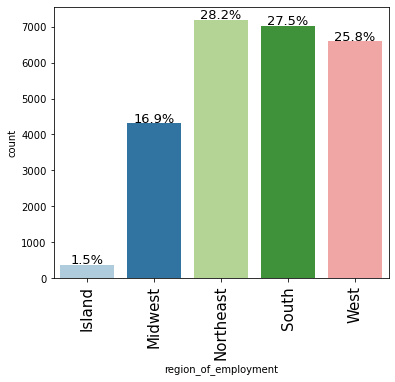

<IPython.core.display.Javascript object>

In [24]:
# Visualize the variable
labeled_barplot(df, "region_of_employment", perc=True)
# plt.savefig("RegionBar.jpg", bbox_inches="tight")

* Fairly even breakdown except for Island at only 1.5%
* Next lowest selection is Midwest at 16.9%
* The NE, S, and W are all in the upper 20% range

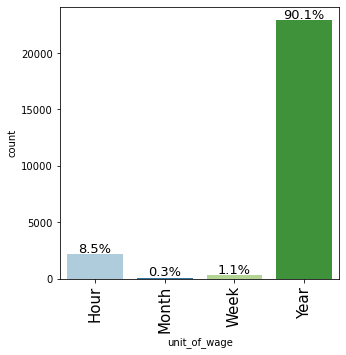

<IPython.core.display.Javascript object>

In [25]:
# Visualize the variable
labeled_barplot(df, "unit_of_wage", perc=True)
# plt.savefig("UnitWageBar.jpg", bbox_inches="tight")

* 90% of wages are given annualy
* 8.5% of wages are hourly 
* Less than 2% are given by month and week

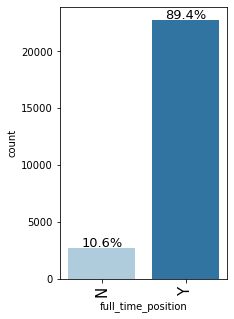

<IPython.core.display.Javascript object>

In [26]:
# Visualize the variable
labeled_barplot(df, "full_time_position", perc=True)
# plt.savefig("FullTimeBar.jpg", bbox_inches="tight")

* Most applicants are coming for a full time position
* Makes sense to travel to another country for full time work versus part time (financially)

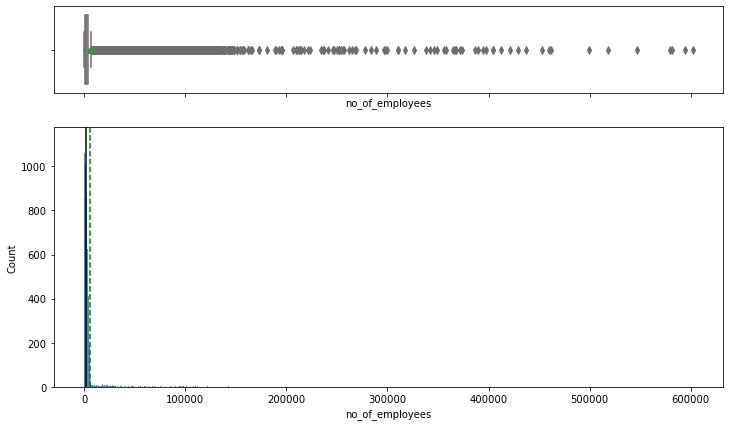

<IPython.core.display.Javascript object>

In [27]:
# Visualize the variable
histogram_boxplot(df, "no_of_employees")

* Extreme right skew
* So much that I can't derive much from this plot (except that)
* Will have to dig more into this in the processing step

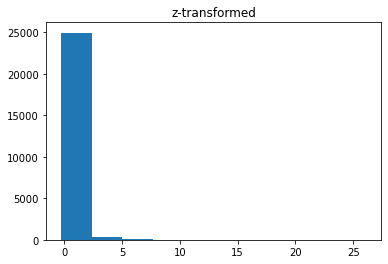

<IPython.core.display.Javascript object>

In [28]:
# Do a z transform to plot skewed no of employees
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


plt.hist(z_transform(df["no_of_employees"]))
plt.title("z-transformed")
plt.show()

* Definitely will need to treat this column for outliers

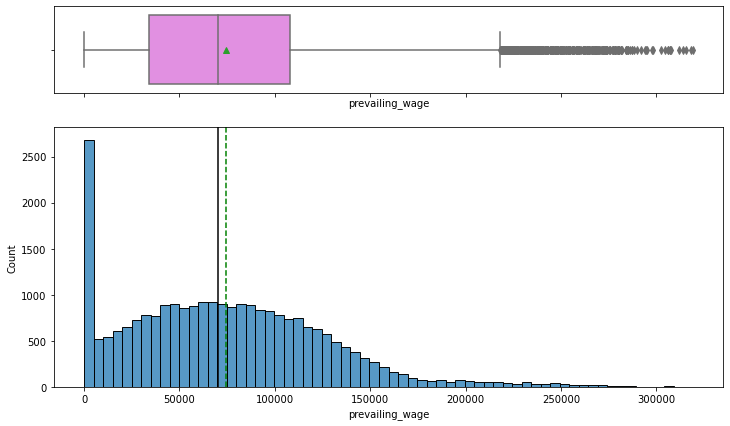

<IPython.core.display.Javascript object>

In [29]:
# Visualize the variable
histogram_boxplot(df, "prevailing_wage")

* Prevailing wage tries to have a normal distribution 
* But high amounts in the 0 bracket
* A right skew develops 
* Mean and median are somewhat close in value
* Wonder if the units play a factor in this

### Bivariate Analysis

In [30]:
# Let's start with correlations
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("yr_of_estab")  # dropping year column as it is temporal variable

<IPython.core.display.Javascript object>

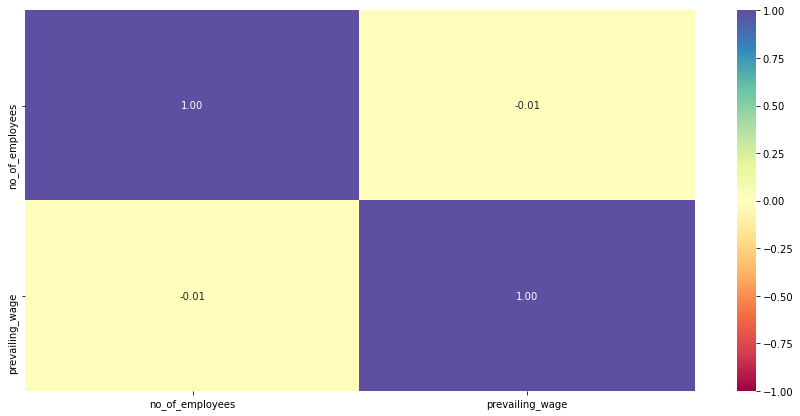

<IPython.core.display.Javascript object>

In [31]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
# plt.savefig("heat_map.jpg", bbox_inches="tight")
plt.show()

* Only 2 features to correlate, yikes
* There isn't correlation between prevailing wage and no of employees

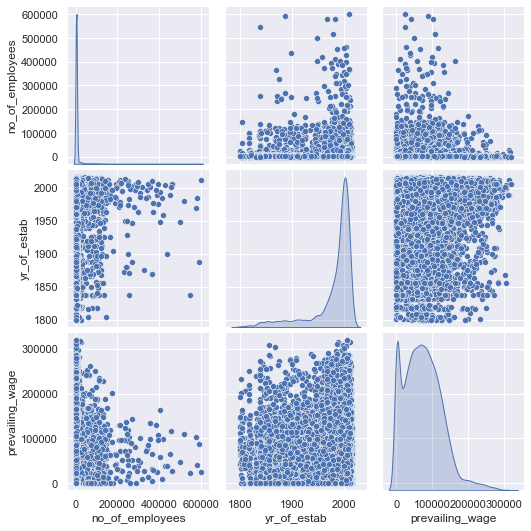

<IPython.core.display.Javascript object>

In [32]:
# Pairplot to look at distributions and scatterplots
sns.set(rc={"figure.figsize": (16, 9)})
sns.pairplot(df, diag_kind="kde")
plt.show()

* Not much to be gained from this plot
* Another visualization of the distributions

In [33]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [34]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


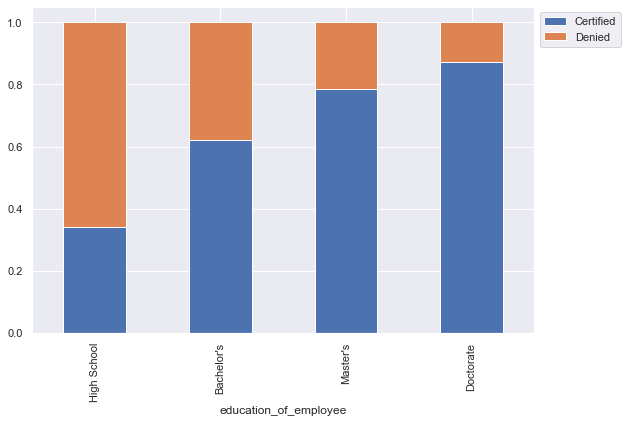

<IPython.core.display.Javascript object>

In [35]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df, "education_of_employee", "case_status")

* High School education is the only education category that is denied more than certified, 66% denied
* Highest category of applicants have bachelor's degree and 62% that have the degree get certified
* Next highest is Master's degree and 78% get certified out of the category
* Doctorate holders get certified nearly all the time, 87%

Education does seem to play a role in Visa certification.  Not holding a higher education degree increases your chance to get denied.  The higher the education the better percentage of getting a Visa certification.


2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


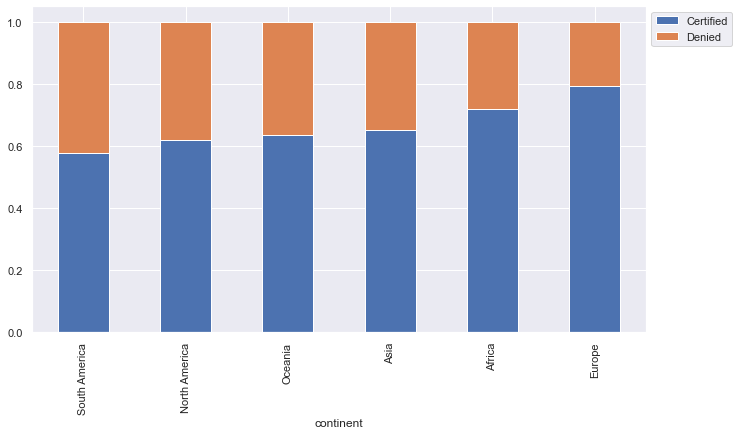

<IPython.core.display.Javascript object>

In [36]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df, "continent", "case_status")

* Percentages by continent of certified are fairly close, between 50% and 80%
* Asia has the highest amount of applicants by far, and an acceptance of 65%
* Europe has the highest percentage of certified at 79%
* South America has the lowest certified percentage at 58%
* Though Europe doesn't have a high amount of applicants they have the best percentage of Visa approvals

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


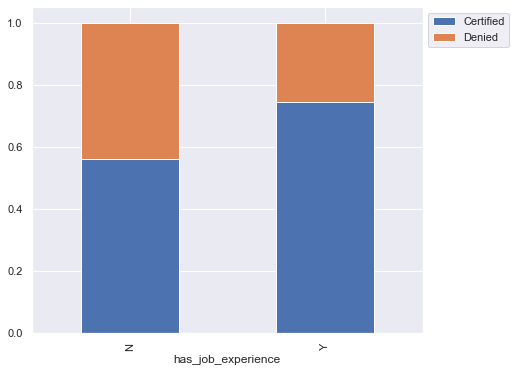

<IPython.core.display.Javascript object>

In [37]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df, "has_job_experience", "case_status")

* With work experience there is a higher percentage of acceptance 74%
* Without work experience, the certified percentage is 56%; Much lower percentage of Visa's approved without work experience
* Experienced professionals have a better chance of getting the Visa approved

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


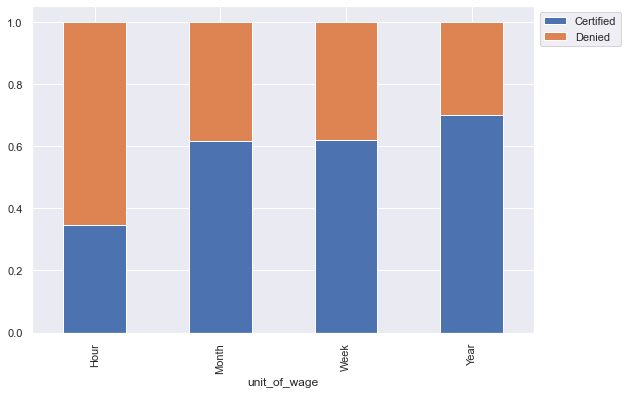

<IPython.core.display.Javascript object>

In [38]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df, "unit_of_wage", "case_status")

* Year pay unit is most likely to be certified for a visa, 70% (it's also the highest frequency)
* Hour pay unit is most likely to be denied, 65% denied
* Week and month are both just above 60% on certified

7. Which region do most certified applicants prefer?

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


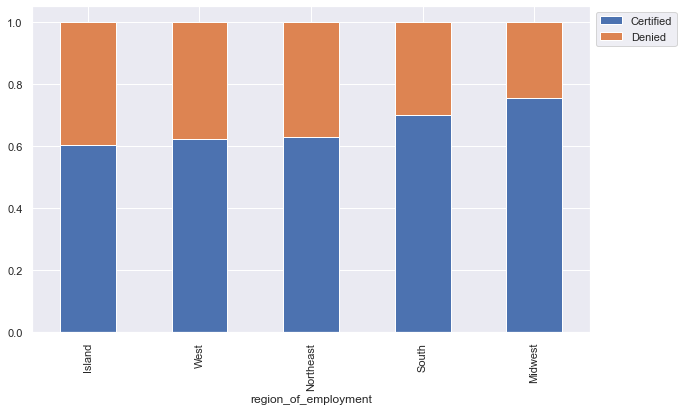

<IPython.core.display.Javascript object>

In [39]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df, "region_of_employment", "case_status")

* Midwest has the highest percentage of approved visas, 76%
* The lowest percentage is Island at 60%
* Range between regions is small, 60%-76%

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

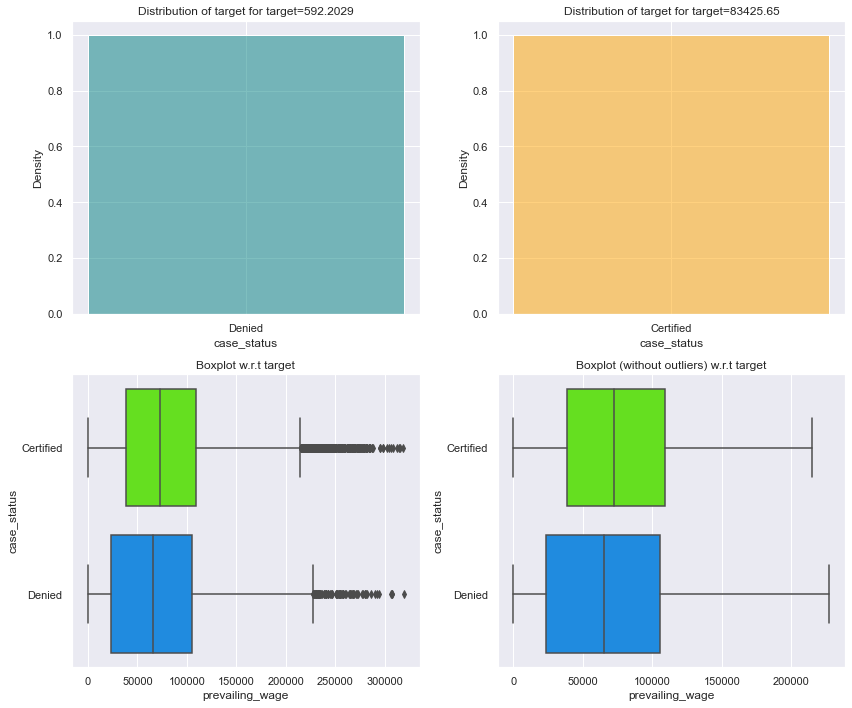

<IPython.core.display.Javascript object>

In [40]:
distribution_plot_wrt_target(df, "case_status", "prevailing_wage")

* The density plots don't offer info BUT the boxplots do
* It appears certified wages have a higher amount and smaller range compared to denied

In [41]:
# Check averages of each market
markets = (
    df.groupby(by=["case_status"])["prevailing_wage"].mean().to_frame().reset_index()
)
markets.sort_values(by="prevailing_wage")

,case_status,prevailing_wage
1,Denied,68748.681580
0,Certified,77293.619243


<IPython.core.display.Javascript object>

* The overall average of ceritifed is higher by almost 10000

In [42]:
# Create a subset of only the Certified type
df_Certified = df[df.case_status == "Certified"]
df_Certified.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified


<IPython.core.display.Javascript object>

In [43]:
# Create a subset of only the Certified type
df_Denied = df[df.case_status == "Denied"]
df_Denied.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
11,Asia,High School,Y,N,4069,2005,Northeast,70813.0900,Year,Y,Denied


<IPython.core.display.Javascript object>

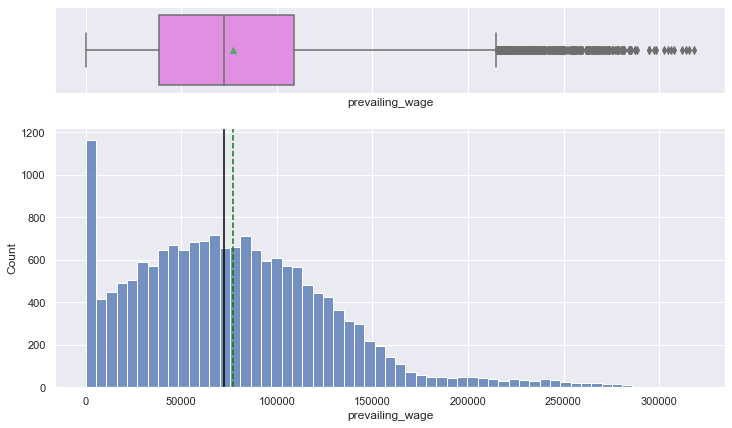

<IPython.core.display.Javascript object>

In [44]:
# Visualize the variable
histogram_boxplot(df_Certified, "prevailing_wage")

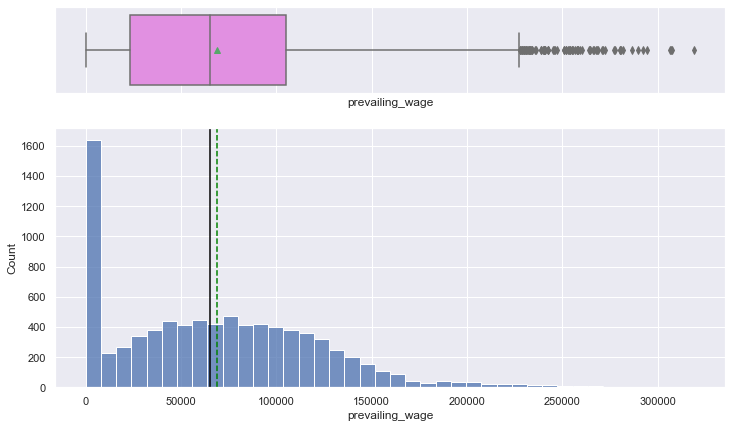

<IPython.core.display.Javascript object>

In [45]:
# Visualize the variable
histogram_boxplot(df_Denied, "prevailing_wage")

* Distributions are similar between certified and denied
* There is a higher count in the lowest bin for denied (by ~500)
* The middle wages are higher counts in certified
* The high wages go higher in certified
* Certified wages in the interquartile range start higher than denied; it's also a smaller range; perhaps that indicates the push to keep certified applicants in a higher middle range

6. Do longer established companies have people being certified more compared to newer established companies?

In [46]:
df2 = df_Certified.groupby("yr_of_estab")["case_status"].value_counts()
df2.head()

yr_of_estab  case_status
1800         Certified      11
1801         Certified       6
1804         Certified      10
1807         Certified       4
1809         Certified       5
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='yr_of_estab,case_status'>

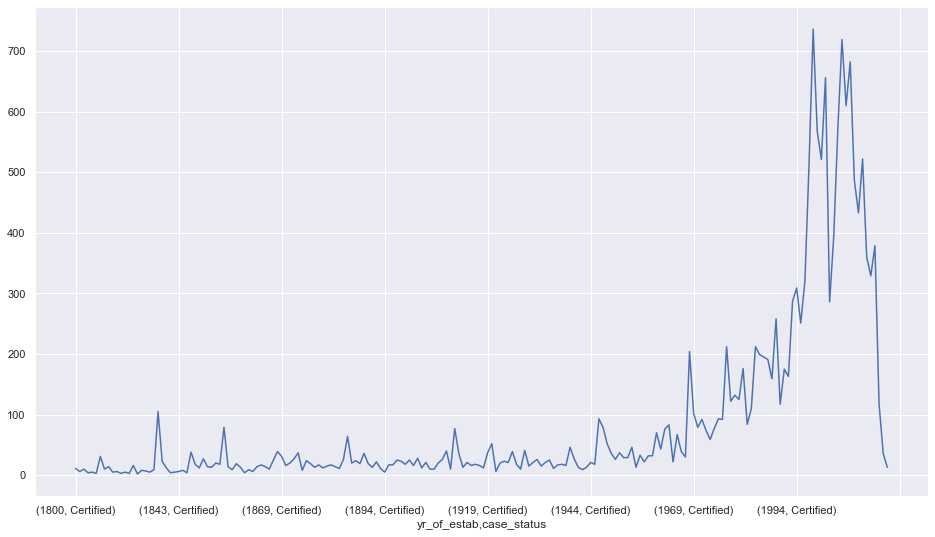

<IPython.core.display.Javascript object>

In [47]:
df2.plot.line()

In [48]:
df3 = df_Denied.groupby("yr_of_estab")["case_status"].value_counts()
df3.head()

yr_of_estab  case_status
1800         Denied         5
1801         Denied         6
1804         Denied         8
1807         Denied         2
1809         Denied         4
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='yr_of_estab,case_status'>

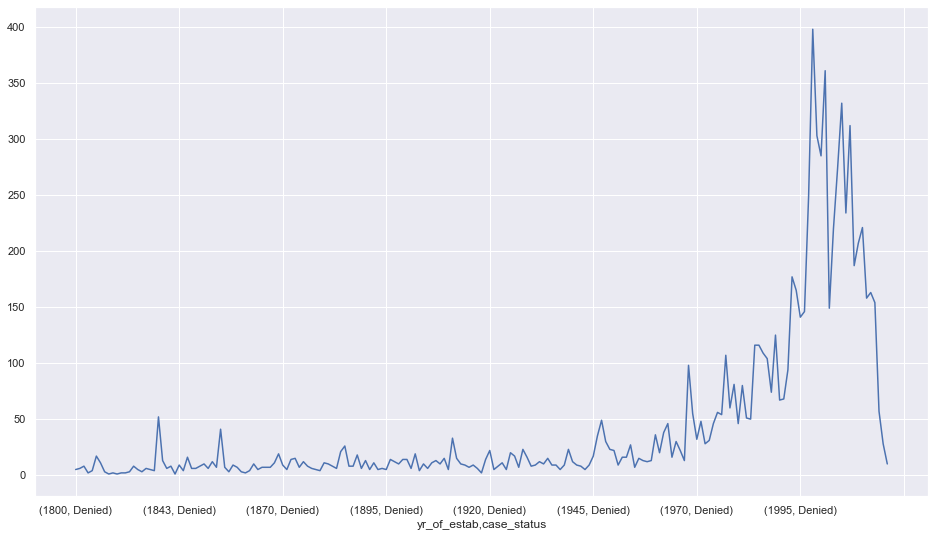

<IPython.core.display.Javascript object>

In [49]:
df3.plot.line()

* Companies established before 1970 have fewer than 50 applicants denied and fewer than 100 applicants approved
* Both denied and approved applicants have the highest frequencies after 1995
* Newer established companies have higher applicants certified vs older est companies
* But new established companies also have a higher amount of denied versus old est companies

8. Does prevailing wage differ based on region of employment? 

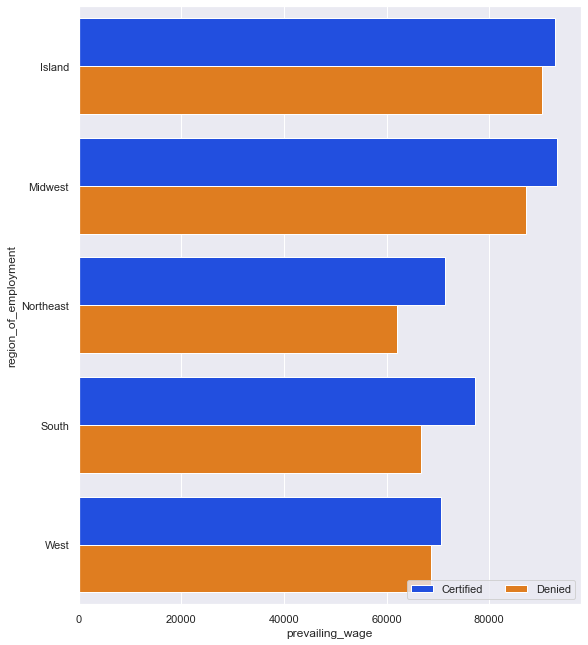

<IPython.core.display.Javascript object>

In [50]:
# Display stacked barplot to visual region vs prevailing wages
plt.figure(figsize=(9, 11))  # To resize the plot

# Plot total production per state
sns.barplot(
    x="prevailing_wage",
    y="region_of_employment",
    data=df.sort_values("prevailing_wage", ascending=False),
    # label="Prevailing Wage",
    hue="case_status",
    palette="bright",
    # color="b",
    ci=None,
)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

* Higher wages are seen in Island and Midwest regions (exceeding 90000)
* Northeast has the lowest, peaking at ~68000

9. How does the job experience vary across different continents? Need for job training?

has_job_experience      N      Y    All
continent                              
All                 10678  14802  25480
Asia                 7071   9790  16861
Europe               1576   2156   3732
North America        1348   1944   3292
South America         377    475    852
Africa                217    334    551
Oceania                89    103    192
------------------------------------------------------------------------------------------------------------------------


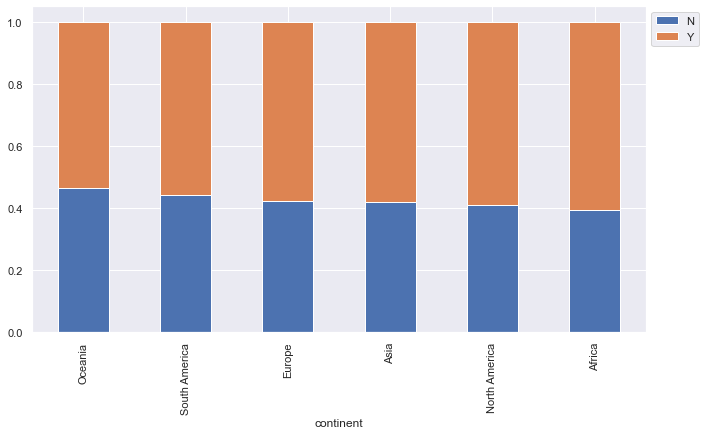

<IPython.core.display.Javascript object>

In [51]:
# Display stacked barplot to visual case status vs continent with counts
stacked_barplot(df, "continent", "has_job_experience")

* Wow, normalized job experience is nearly equal across the continents
* Africa has the highest percentage of job experience at 54%
* Oceania has the lowest percentage of job experience at 61%
* Across each continent, over half of the applicants have job experience

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------


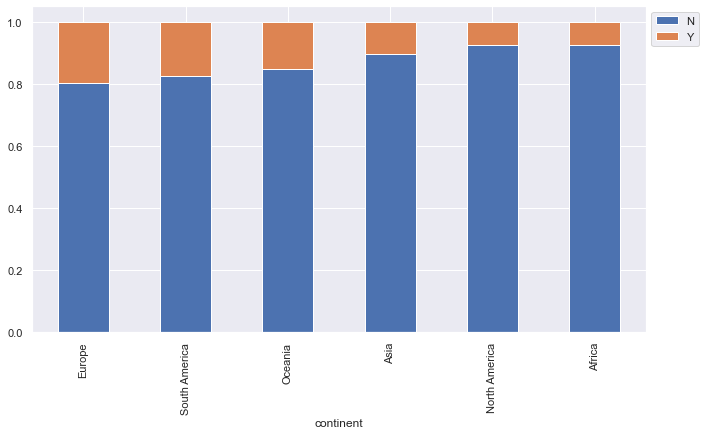

<IPython.core.display.Javascript object>

In [52]:
# Display stacked barplot to visual case status vs continent with counts
stacked_barplot(df, "continent", "requires_job_training")

* Very small percentage overall requires job training in the total applicants, 12%
* Africa applicants have the highest percentage of not needing training at 93%
* Europe has the lowest percentage of not needing training at 80%
* Small range across all continents in reference to not needing training for applicants

10. How does the education vary across different continents?

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


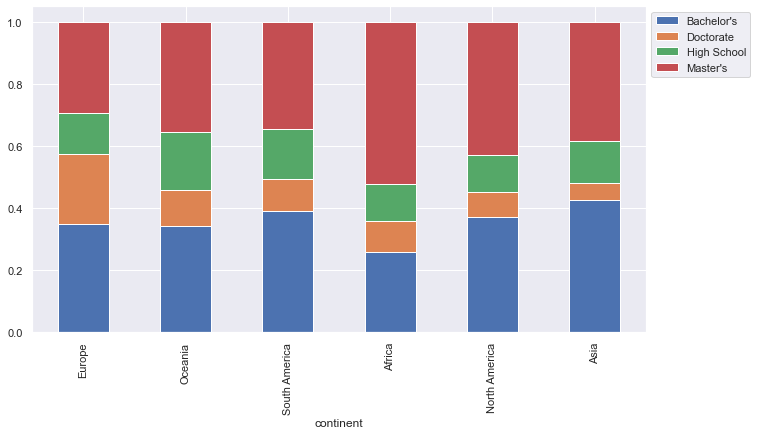

<IPython.core.display.Javascript object>

In [53]:
# Display stacked barplot to visual case status vs continent with counts
stacked_barplot(df, "continent", "education_of_employee")

* Asia has the highest number of Doctorate degrees in applicants but normalized Europe has the highest percentage of Doctorate degrees at 23% and Asia the smallest percentage 5%
* Africa has the highest percentage of Masters degrees, 52%, and South America the lowest, 34%
* Asia has the highest percentage of Bachelor degrees, 43%, and Africa the lowest, 10%
* Oceania has the highest percentage of high school degrees, 19%, and Africa the lowest, 12%

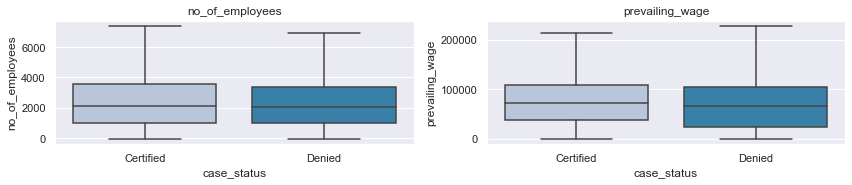

<IPython.core.display.Javascript object>

In [196]:
cols = df[["no_of_employees", "prevailing_wage"]].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["case_status"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Not much difference between certified/denied in the numerical categories

### EDA Summary

* 66% of applicants get certified
* Education does appear to play a role in Visa Certification
    * High School education applicants have a higher chance of getting denied, 66% (though only 13.4% of applicants meet this category)
    * Having a Doctorate has a chance of getting certified by 87%
    * Masters, 78%
    * Bachelor’s 62% (most common education type for applicants)
* Visa status varies across continents between 55%-80%
    * Europe has the highest certification percentage, 79%
    * Asia has the highest count of applicants and acceptance rate of 65%
    * South America has the lowest certified percentage of 58%
* With work experience there is a higher percentage of acceptance 74%
* Without work experience, the certified percentage is 56%; Much lower percentage of Visa's approved without work experience
* Year pay unit is most likely to be certified for a visa, 70% (it's also the highest frequency)
* Hour pay unit is most likely to be denied, 65% denied
* Week and month are both just above 60% on certified
* Range between regions is small, 60%-76% for certified
    * Midwest has the highest percentage of approved visas, 76%
    * The lowest percentage is Island at 60%
* It appears certified wages have a higher amount and smaller range compared to denied
* The overall average of ceritifed is higher by almost 10000 – prevailing wage
* Distributions are similar between certified and denied
* Certified wages in the interquartile range start higher than denied; it's also a smaller range; perhaps that indicates the push to keep certified applicants in a higher middle range
* Newer established companies have higher applicants certified vs older est companies
* But new established companies also have a higher amount of denied versus old est companies
* Companies established before 1970 have fewer than 50 applicants denied and fewer than 100 applicants approved
* Both denied and approved applicants have the highest frequencies after 1995
* Higher wages are seen in Island and Midwest regions (exceeding 90000)
* Northeast has the lowest wages, peaking at ~68000
* Job experience is nearly equal across the continents
* Across each continent, over half of the applicants have job experience
* Very small percentage overall requires job training in the total applicants, 12%
    * Africa applicants have the highest percentage of not needing training at 93%
    * Europe has the lowest percentage of not needing training at 80%
* Asia has the highest number of Doctorate degrees in applicants but normalized Europe has the highest percentage of Doctorate degrees at 23% and Asia the smallest percentage 5%
* Africa has the highest percentage of Masters degrees, 52%, and South America the lowest, 34%
* Asia has the highest percentage of Bachelor degrees, 43%, and Africa the lowest, 10%
* Oceania has the highest percentage of high school degrees, 19%, and Africa the lowest, 12%

### Preliminary thought on profiles

* Certified:
    * Doctorate
    * Masters
    * Europe
    * Work Experience yes
    * Year wage unit
    * Midwest
    
* Denied:
    * High School education
    * No Work Experience
    * Hour pay unit

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

* No missing values in dataframe

### Feature Engineering

In [54]:
# Create a subset of rows with negative or no employees
df_none = df[df.no_of_employees <= 0]
df_none.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied


<IPython.core.display.Javascript object>

In [55]:
# How many rows are we looking at here
df_none.value_counts().sum(axis=0)

33

<IPython.core.display.Javascript object>

* Not that many, let's drop

In [56]:
# Drop the rows with no employees or negative
df1 = df.drop(df[(df["no_of_employees"] <= 0)].index)
df1.value_counts().sum(axis=0)

25447

<IPython.core.display.Javascript object>

In [57]:
# Quick check on the other numeric columns
df[df.prevailing_wage <= 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


<IPython.core.display.Javascript object>

In [58]:
# Quick check on the other numeric columns
df[df.yr_of_estab <= 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


<IPython.core.display.Javascript object>

In [59]:
df[df.yr_of_estab <= 1850]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
67,Europe,Doctorate,Y,N,2070,1847,West,5319.4900,Year,Y,Certified
76,Europe,Bachelor's,Y,N,2423,1838,West,2927.3400,Year,Y,Certified
132,Asia,Doctorate,N,N,928,1818,South,30570.9500,Year,Y,Certified
136,Asia,Master's,Y,N,1933,1839,Northeast,63896.3500,Year,Y,Certified
158,North America,Master's,Y,N,1926,1801,West,104281.7100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25386,Asia,Doctorate,N,N,2509,1849,West,491.5601,Hour,Y,Certified
25418,North America,Bachelor's,Y,N,1733,1838,South,137279.8200,Year,Y,Certified
25423,Asia,Master's,Y,N,4017,1848,South,72947.5000,Year,N,Certified
25444,South America,Master's,Y,N,1081,1838,Northeast,156.6070,Hour,Y,Certified


<IPython.core.display.Javascript object>

* Less than 3% of the data falls earlier than 1850
* I will drop it just because of how skewed the temporal field is

In [60]:
# Drop the rows with no employees or negative
df1 = df.drop(df[(df.yr_of_estab <= 1850)].index)
df1.value_counts().sum(axis=0)

24828

<IPython.core.display.Javascript object>

* Now I want to alter prevailing wage, it doesn't make sense to have values in different units (if that is the case)

In [61]:
# Get the number of unique values in each column
df["unit_of_wage"].unique()

['Hour', 'Year', 'Week', 'Month']
Categories (4, object): ['Hour', 'Year', 'Week', 'Month']

<IPython.core.display.Javascript object>

In [62]:
# Check the counts in each unique wage unit
print(df["unit_of_wage"].value_counts())

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64


<IPython.core.display.Javascript object>

* I would prefer to not drop hour/week/year as they make up 10%
* I do need to understand if the prevailing wage is in different units or not
* I will break it up and compare

In [63]:
# Hourly wage data
df_hourly = df1[df1.unit_of_wage == "Hour"]
df_hourly.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,2079.000000,2079.000000,2079.000000
mean,4278.251563,1979.141895,413.991669
std,15080.955801,37.873651,274.354449
min,-26.000000,1851.000000,2.136700
25%,864.500000,1971.000000,152.375000
50%,1843.000000,1995.000000,371.853100
75%,2989.000000,2003.000000,635.324950
max,288512.000000,2016.000000,999.919500


<IPython.core.display.Javascript object>

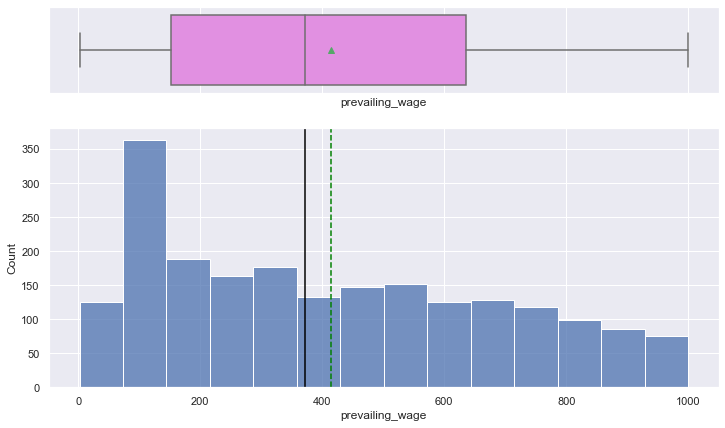

<IPython.core.display.Javascript object>

In [64]:
# Visualize the variable
histogram_boxplot(df_hourly, "prevailing_wage")

In [65]:
# Monthly wage data
df_monthly = df1[df1.unit_of_wage == "Month"]
df_monthly.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,83.000000,83.000000,83.000000
mean,2897.469880,1983.337349,85171.277349
std,4655.362078,32.585826,58018.898975
min,55.000000,1873.000000,1599.280000
25%,897.500000,1977.000000,44822.735000
50%,2115.000000,1996.000000,75288.350000
75%,3155.000000,2005.000000,118457.945000
max,36511.000000,2013.000000,264362.950000


<IPython.core.display.Javascript object>

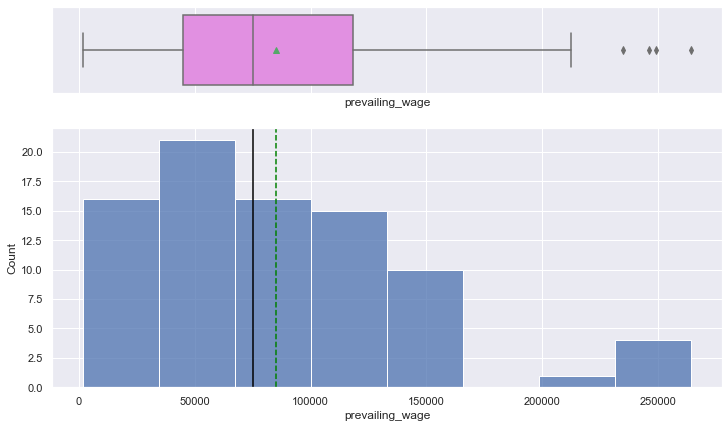

<IPython.core.display.Javascript object>

In [66]:
# Visualize the variable
histogram_boxplot(df_monthly, "prevailing_wage")

In [67]:
# Weekly wage data
df_weekly = df1[df1.unit_of_wage == "Week"]
df_weekly.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,266.000000,266.000000,266.000000
mean,6689.244361,1974.586466,86146.800752
std,26516.746407,40.060544,45093.574940
min,64.000000,1866.000000,2183.230000
25%,1032.250000,1962.000000,51506.605000
50%,1950.000000,1992.500000,85847.915000
75%,3348.000000,2002.000000,113308.587500
max,278152.000000,2016.000000,280175.950000


<IPython.core.display.Javascript object>

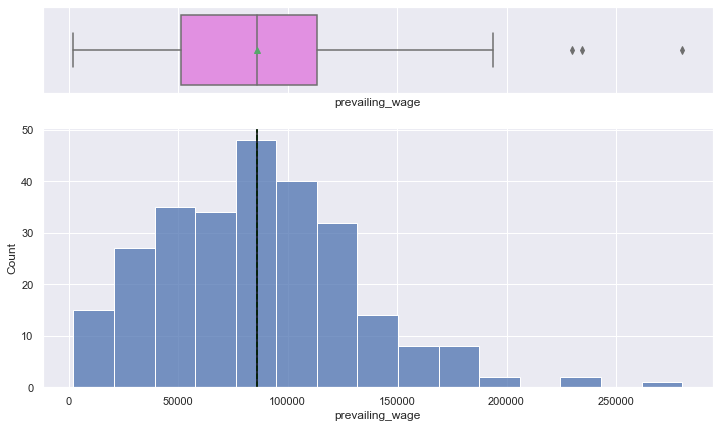

<IPython.core.display.Javascript object>

In [68]:
# Visualize the variable
histogram_boxplot(df_weekly, "prevailing_wage")

In [69]:
# Yearly wage data
df_yearly = df1[df1.unit_of_wage == "Year"]
df_yearly.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,22400.000000,22400.000000,22400.000000
mean,5766.913348,1983.732768,81120.687217
std,23292.975870,35.202915,49871.645506
min,-26.000000,1851.000000,100.000000
25%,1036.000000,1979.000000,43662.392500
50%,2144.000000,1998.000000,76132.245000
75%,3565.000000,2005.000000,111254.095000
max,602069.000000,2016.000000,319210.270000


<IPython.core.display.Javascript object>

* Looks like the values for hourly prevailing wage equate to a daily rate of pay 
* While every other categories prevailing wage looks like an annual pay 
* It is uncertain with the data description because they should all be in the same rate or match the wage unit
* I will test converting just the hourly wage from a 5 day work week over 52.1429 weeks (260.7145) to see if it aligns with the rest of the prevailing wage categories

In [70]:
# Convert prevailing wage values that are tied to an hourly unit to annual salary
df_hourly.prevailing_wage[df_hourly.unit_of_wage == "Hour"] = (
    df_hourly.prevailing_wage * 260.7145
)

<IPython.core.display.Javascript object>

In [71]:
df_hourly.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,2079.000000,2079.000000,2079.000000
mean,4278.251563,1979.141895,107933.630956
std,15080.955801,37.873651,71528.183067
min,-26.000000,1851.000000,557.068672
25%,864.500000,1971.000000,39726.371938
50%,1843.000000,1995.000000,96947.495040
75%,2989.000000,2003.000000,165638.426677
max,288512.000000,2016.000000,260693.512483


<IPython.core.display.Javascript object>

* It now aligns with the rest of the prevailing wage data descriptions
* I want to test this with another wage unit to verify it's not altering wages it shouldn't before applying

In [72]:
# Quick test of monthly data for assurance
df_monthly.prevailing_wage[df_monthly.unit_of_wage == "Hour"] = (
    df_monthly.prevailing_wage * 260.7145
)

<IPython.core.display.Javascript object>

In [73]:
df_monthly.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,83.000000,83.000000,83.000000
mean,2897.469880,1983.337349,85171.277349
std,4655.362078,32.585826,58018.898975
min,55.000000,1873.000000,1599.280000
25%,897.500000,1977.000000,44822.735000
50%,2115.000000,1996.000000,75288.350000
75%,3155.000000,2005.000000,118457.945000
max,36511.000000,2013.000000,264362.950000


<IPython.core.display.Javascript object>

* Data description is not altered
* Will apply to the dataframe

In [74]:
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [75]:
# Convert prevailing wage values that are tied to an hourly unit to annual salary
df2.prevailing_wage[df2.unit_of_wage == "Hour"] = df2.prevailing_wage * 260.7145

<IPython.core.display.Javascript object>

In [76]:
df3 = df2.copy()

<IPython.core.display.Javascript object>

### Outlier detection and treatment

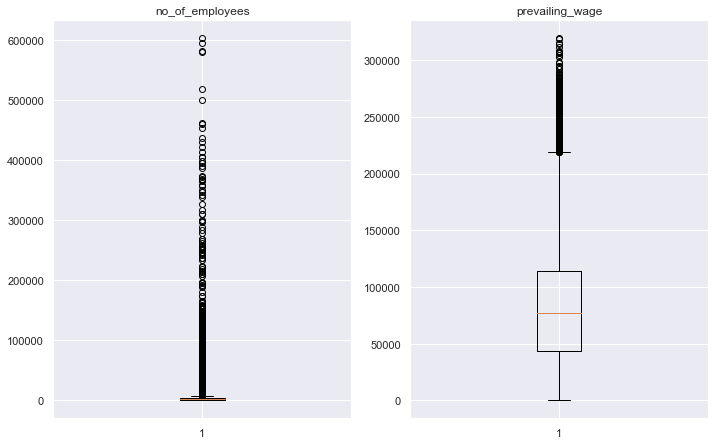

<IPython.core.display.Javascript object>

In [77]:
# let's plot the boxplots of all columns to check for outliers

numeric_columns1 = df2.select_dtypes(include=np.number).columns.tolist()
numeric_columns1.remove(
    "yr_of_estab"
)  # dropping year column as it is temporal variable

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns1):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Definitely outliers in both

In [78]:
# Functions to identify and treat outliers from course content (MLS)
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [79]:
df4 = treat_outliers_all(df2, numeric_columns1)

<IPython.core.display.Javascript object>

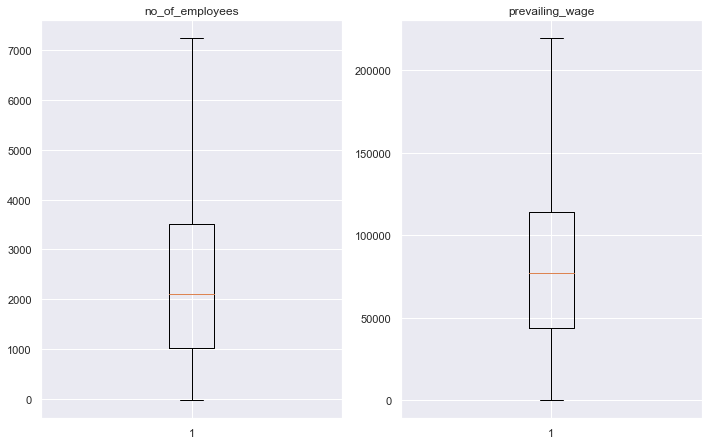

<IPython.core.display.Javascript object>

In [81]:
# let's plot the boxplots of all columns to check for outliers


plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns1):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df4[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Looks much better
* I just worry at how much could've been removed from no_of_employees and it seems realistic for companies to have >7200 employees

In [82]:
# Hourly wage data
df_emp = df1[df1.no_of_employees > 7200]
df_emp.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,1509.000000,1509.000000,1509.000000
mean,59032.974818,1981.862160,74967.341360
std,73685.574376,35.990138,51388.003331
min,7242.000000,1852.000000,21.132700
25%,16864.000000,1976.000000,34707.810000
50%,29434.000000,1997.000000,72665.490000
75%,80835.000000,2005.000000,107293.440000
max,602069.000000,2016.000000,318446.050000


<IPython.core.display.Javascript object>

* The outlier treatment is cutting 6% of the data
* Will exagerate the treatment to treat a little less

In [83]:
def xtreat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 2 * IQR
    Upper_Whisker = Q3 + 2 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def xtreat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = xtreat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [84]:
numeric_columns2 = df3.select_dtypes(include=np.number).columns.tolist()
numeric_columns2.remove(
    "yr_of_estab"
)  # dropping year column as it is temporal variable

df5 = xtreat_outliers_all(df3, numeric_columns2)

<IPython.core.display.Javascript object>

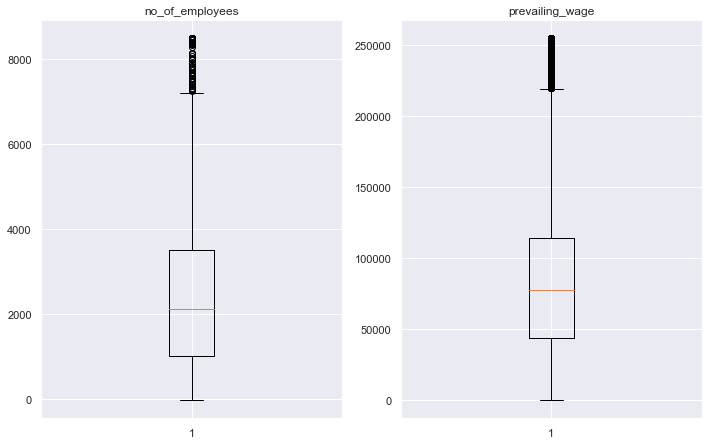

<IPython.core.display.Javascript object>

In [85]:
# let's plot the boxplots of all columns to check for outliers

# numeric_columns2 = df5.select_dtypes(include=np.number).columns.tolist()
# numeric_columns2.remove(
#    "yr_of_estab"
# )  # dropping year column as it is temporal variable

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns2):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df5[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Only cutting ~5% and leaving some of the higher values that are reasonable in the data feels better
* Will use df5 for the model building

In [86]:
# Hourly wage data
df_emp = df5[df5.no_of_employees > 7000]
df_emp.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,1518.000000,1518.000000,1518.000000
mean,8448.089427,1981.901845,83247.506539
std,169.687114,35.918005,51174.070753
min,7015.000000,1852.000000,100.000000
25%,8477.750000,1976.000000,44653.275000
50%,8477.750000,1997.000000,78406.880000
75%,8477.750000,2005.000000,113000.985000
max,8477.750000,2016.000000,254374.142500


<IPython.core.display.Javascript object>

* Need to look into no_of_employees...the quartiles all the same suggest some bad values

In [90]:
# df_emp.head()
# Get the number of unique values in each column
df_emp["no_of_employees"].value_counts()

8477.75    1457
7595.00       1
7118.00       1
7607.00       1
7659.00       1
7261.00       1
8145.00       1
7285.00       1
8366.00       1
7195.00       1
8016.00       1
7778.00       1
7105.00       1
7155.00       1
7242.00       1
7359.00       1
8441.00       1
8315.00       1
8100.00       1
7795.00       1
7528.00       1
7828.00       1
7880.00       1
7609.00       1
7262.00       1
8003.00       1
7400.00       1
8387.00       1
7453.00       1
8000.00       1
7902.00       1
7999.00       1
8280.00       1
7110.00       1
8389.00       1
7407.00       1
7477.00       1
7991.00       1
8462.00       1
8474.00       1
7135.00       1
7106.00       1
7981.00       1
7994.00       1
8374.00       1
7046.00       1
8127.00       1
8338.00       1
8052.00       1
7290.00       1
7592.00       1
7739.00       1
8355.00       1
7668.00       1
7687.00       1
7457.00       1
7320.00       1
7553.00       1
7833.00       1
8438.00       1
7640.00       1
7015.00       1
Name: no

<IPython.core.display.Javascript object>

In [93]:
df_emp_t = df5[df5.no_of_employees == 8477.75]
df_emp_t.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,1457.00,1457.000000,1457.000000
mean,8477.75,1981.913521,83154.852258
std,0.00,35.762313,51317.552918
min,8477.75,1852.000000,100.000000
25%,8477.75,1976.000000,44585.840000
50%,8477.75,1997.000000,78306.070000
75%,8477.75,2005.000000,112764.810000
max,8477.75,2016.000000,254374.142500


<IPython.core.display.Javascript object>

In [94]:
# Drop the rows with no employees or negative
df5 = df5.drop(df5[(df5.no_of_employees == 8477.75)].index)
df5.value_counts().sum(axis=0)

23371

<IPython.core.display.Javascript object>

* Still 92% of the data intact

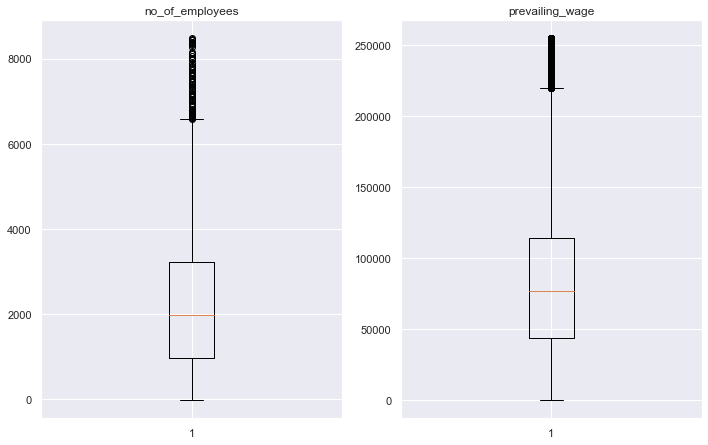

<IPython.core.display.Javascript object>

In [97]:
# let's plot the boxplots of all columns to check for outliers

numeric_columns3 = df5.select_dtypes(include=np.number).columns.tolist()
numeric_columns3.remove(
    "yr_of_estab"
)  # dropping year column as it is temporal variable

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns3):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df5[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Will split the data set and create dummy variables to prep for the modeling portion
* However need to do the follow on EDA first

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis

11. What percentage of applicants get certified?

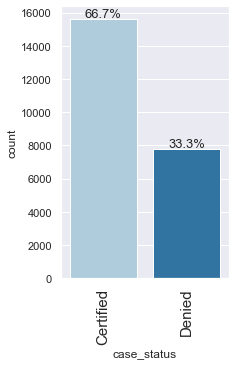

<IPython.core.display.Javascript object>

In [200]:
# First want to visualize the planned predicted variable
labeled_barplot(df5, "case_status", perc=True)
plt.savefig("CaseStatusBar.jpg", bbox_inches="tight")

No Change
* 2/3 of applicants end up getting certified
* While 1/3 get denied
* Will be important to try and develop of profile of both

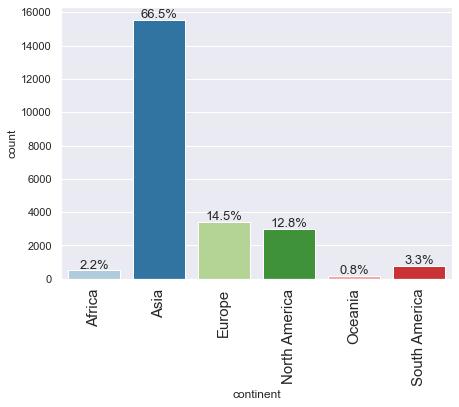

<IPython.core.display.Javascript object>

In [100]:
# Now need to visualize the rest of the variables
labeled_barplot(df5, "continent", perc=True)
# plt.savefig("ContinentBar.jpg", bbox_inches="tight")

Minor Change
* 66% of applicants are from Asia
* The next highest is Europe at 14.5%
* Followed by North America as 12.8%
* The rest of the continents make up the remaining percentage 

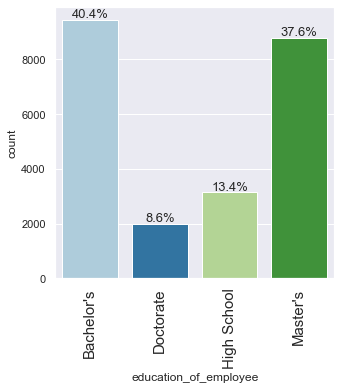

<IPython.core.display.Javascript object>

In [209]:
# Visualize the variable
labeled_barplot(df5, "education_of_employee", perc=True)
plt.savefig("EducationBar.jpg", bbox_inches="tight")

No Change
* Only 13.4% of applicants do not have a post HS education | predominantly higher education in applicants
* Highest is Bachelor's followed by Master's
* Lowest education is Doctorate

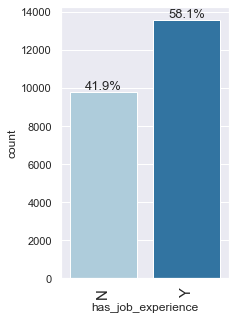

<IPython.core.display.Javascript object>

In [214]:
# Visualize the variable
labeled_barplot(df5, "has_job_experience", perc=True)
plt.savefig("JobExpBar.jpg", bbox_inches="tight")

No Change
* Nearly an even split with job experience, 58.1% yes and 41.9% no

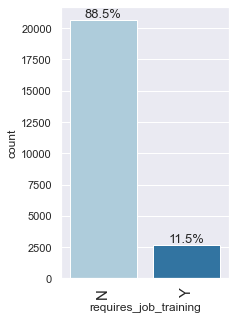

<IPython.core.display.Javascript object>

In [103]:
# Visualize the variable
labeled_barplot(df5, "requires_job_training", perc=True)
# plt.savefig("ReqJobTrainBar.jpg", bbox_inches="tight")

##### Minor Change
* Suspected 'requires job training' to match the job experience percentages
* Surprised to see the difference
* 88.% of applicants do not need job training (though 41.9% don't have job experience)
* And 11.5% require job training

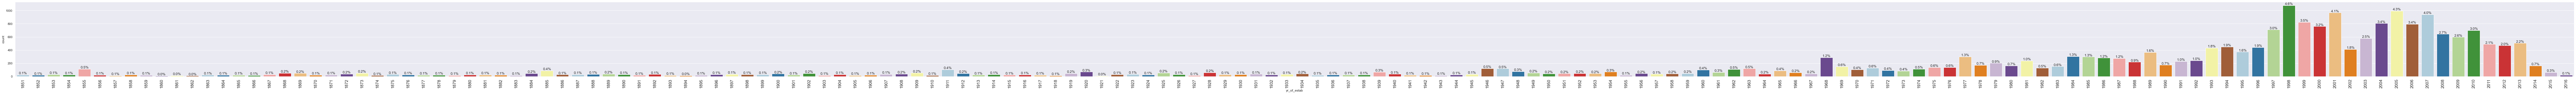

<IPython.core.display.Javascript object>

In [104]:
# Visualize the variable
labeled_barplot(df5, "yr_of_estab", perc=True)
# plt.savefig("YrEstBar.jpg", bbox_inches="tight")

No Change noticeable
* Based on the number of unique years, can't make much out on this plot
* Except there are higher frequencies in the later years

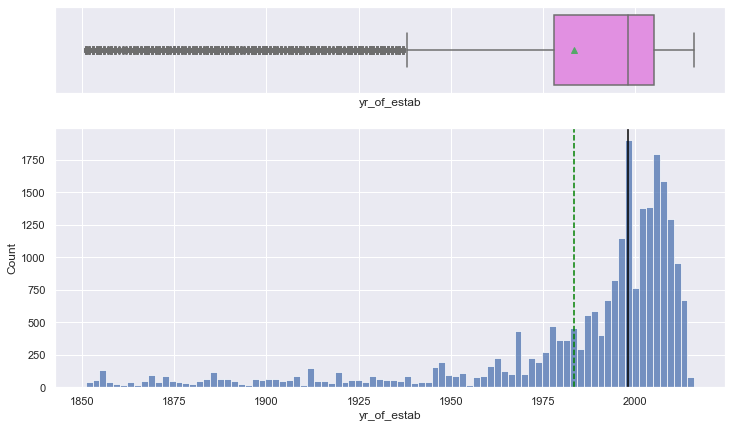

<IPython.core.display.Javascript object>

In [201]:
# Let's try the histogram and boxplot to try and gain some univariate insight
histogram_boxplot(df5, "yr_of_estab")
plt.savefig("YrEstBar.jpg", bbox_inches="tight")

Easier to see the histogram with some values cut
* Most of the companies (applicants work for) were established after 2000
* Median is right below 2000 and mean is not at the same time (strong left skew)

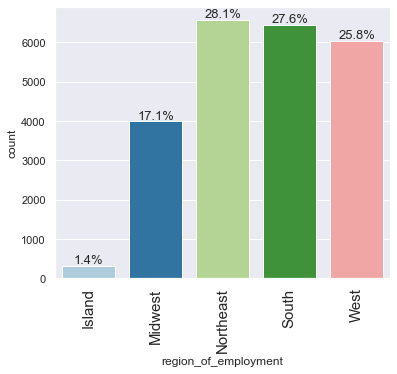

<IPython.core.display.Javascript object>

In [215]:
# Visualize the variable
labeled_barplot(df5, "region_of_employment", perc=True)
plt.savefig("RegionBar.jpg", bbox_inches="tight")

Minor Change 
* Fairly even breakdown except for Island at only 1.4% (was 1.5%)
* Next lowest selection is Midwest at 17.1%
* The NE, S, and W are all in the upper 20% range

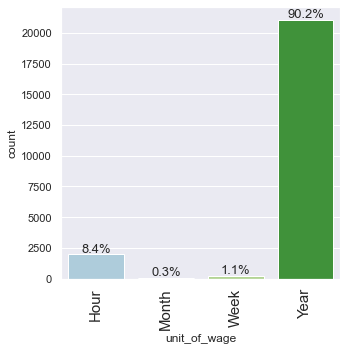

<IPython.core.display.Javascript object>

In [202]:
# Visualize the variable
labeled_barplot(df5, "unit_of_wage", perc=True)
plt.savefig("UnitWageBar.jpg", bbox_inches="tight")

No Change noticeable
* 90% of wages are given annualy
* 8.4% (was 8.5%) of wages are hourly 
* Less than 2% are given by month and week

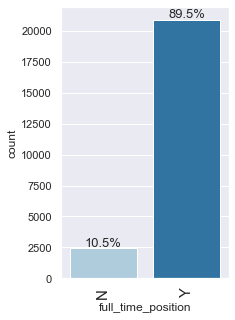

<IPython.core.display.Javascript object>

In [108]:
# Visualize the variable
labeled_barplot(df5, "full_time_position", perc=True)
# plt.savefig("FullTimeBar.jpg", bbox_inches="tight")

No Change
* Most applicants are coming for a full time position
* Makes sense to travel to another country for full time work versus part time (financially)

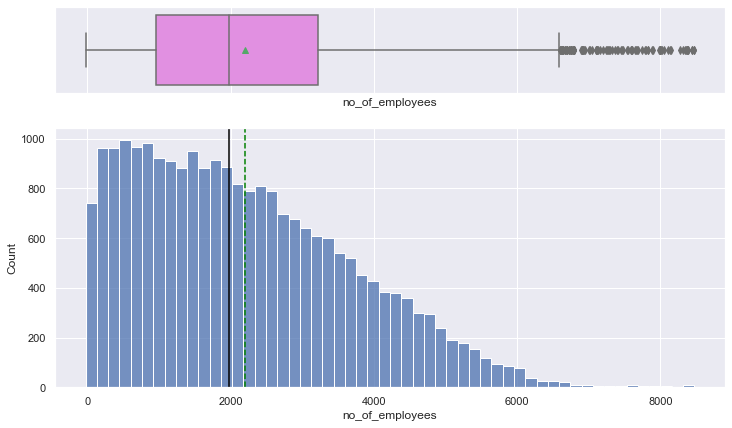

<IPython.core.display.Javascript object>

In [109]:
# Visualize the variable
histogram_boxplot(df5, "no_of_employees")

* Still has a right skew
* Can visualize the data post processing
* Median and mean are somewhat close together around 2000 employees

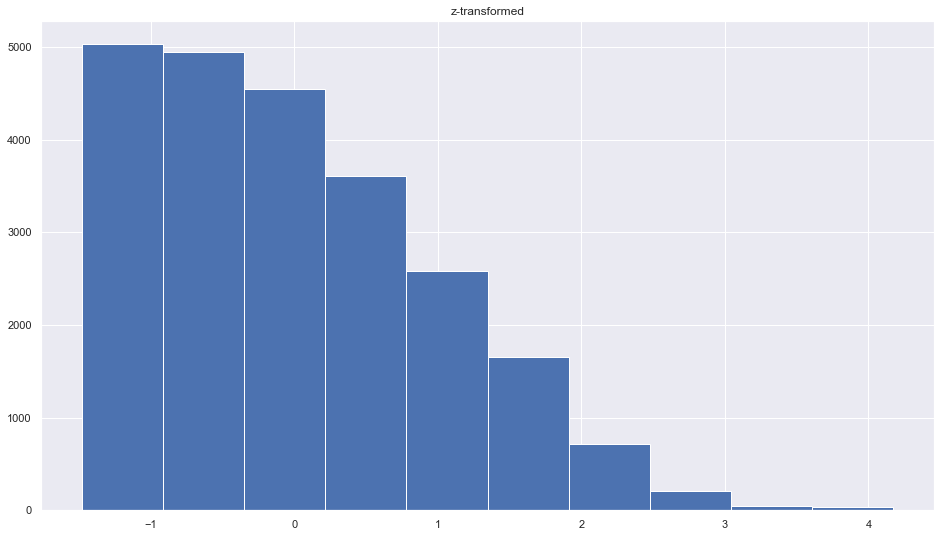

<IPython.core.display.Javascript object>

In [110]:
# Do a z transform to plot skewed no of employees
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


plt.hist(z_transform(df5["no_of_employees"]))
plt.title("z-transformed")
plt.show()

* Treated this column for outliers
* Can see the staircase right skew

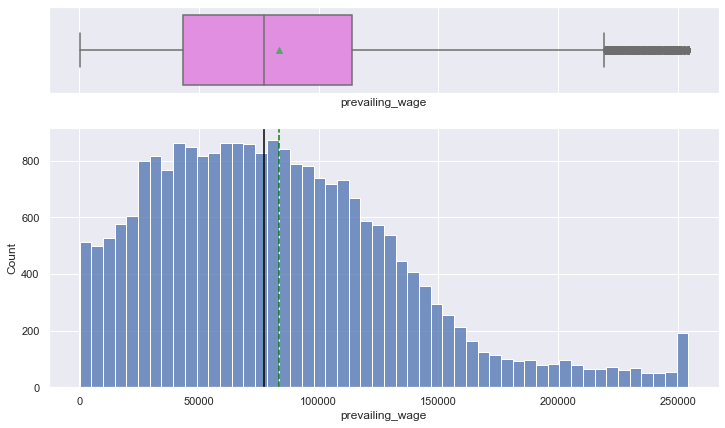

<IPython.core.display.Javascript object>

In [111]:
# Visualize the variable
histogram_boxplot(df5, "prevailing_wage")

* Clean up after data processing
* A right skew but has some increasing climb before hitting mean/median
* Mean and median are somewhat close in value
* Most applicants make below 150k

### Bivariate Analysis

In [112]:
# Let's start with correlations
numeric_columns4 = df5.select_dtypes(include=np.number).columns.tolist()
numeric_columns4.remove(
    "yr_of_estab"
)  # dropping year column as it is temporal variable

<IPython.core.display.Javascript object>

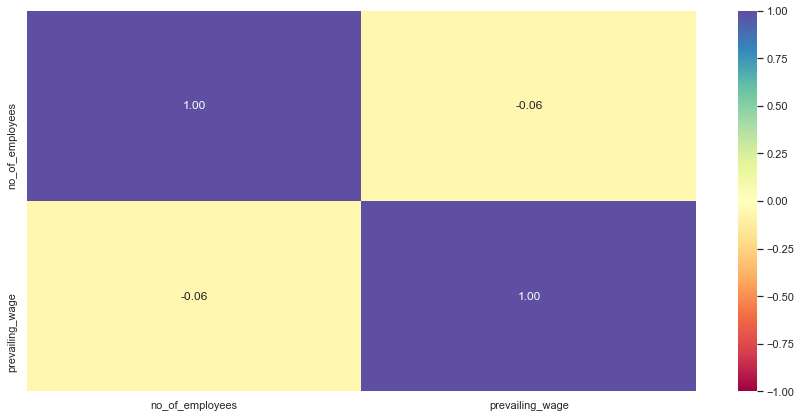

<IPython.core.display.Javascript object>

In [113]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df5[numeric_columns4].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
# plt.savefig("heat_map.jpg", bbox_inches="tight")
plt.show()

No Change
* Only 2 features to correlate, yikes
* There isn't correlation between prevailing wage and no of employees

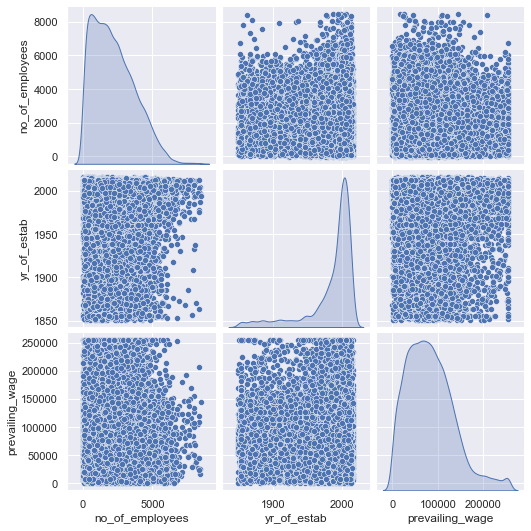

<IPython.core.display.Javascript object>

In [114]:
# Pairplot to look at distributions and scatterplots
sns.set(rc={"figure.figsize": (16, 9)})
sns.pairplot(df5, diag_kind="kde")
plt.show()

* Not much to be gained from this plot
* Another visualization of the distributions

In [206]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    # plt.show()

<IPython.core.display.Javascript object>

In [208]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    # plt.show()

<IPython.core.display.Javascript object>

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

case_status            Certified  Denied    All
education_of_employee                          
All                        15597    7774  23371
Bachelor's                  5885    3562   9447
High School                 1065    2078   3143
Master's                    6896    1885   8781
Doctorate                   1751     249   2000
------------------------------------------------------------------------------------------------------------------------


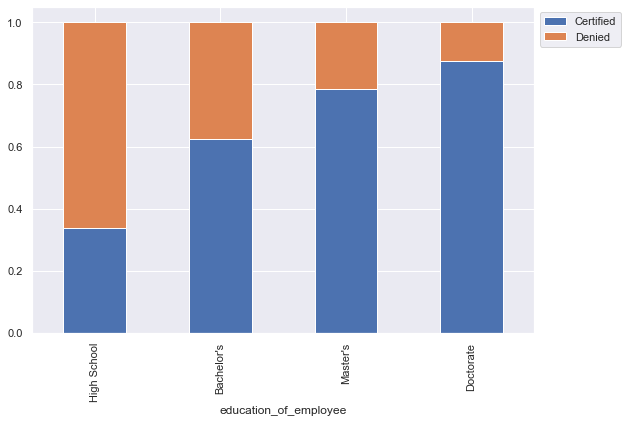

<IPython.core.display.Javascript object>

In [207]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df5, "education_of_employee", "case_status")
plt.savefig("Education_status.jpg", bbox_inches="tight")

No Change
* High School education is the only education category that is denied more than certified, 66% denied
* Highest category of applicants have bachelor's degree and 62% that have the degree get certified
* Next highest is Master's degree and 78% get certified out of the category
* Doctorate holders get certified nearly all the time, 87%

Education does seem to play a role in Visa certification.  Not holding a higher education degree increases your chance to get denied.  The higher the education the better percentage of getting a Visa certification.


2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                15597    7774  23371
Asia               10157    5383  15540
North America       1842    1139   2981
Europe              2689     709   3398
South America        438     332    770
Africa               360     145    505
Oceania              111      66    177
------------------------------------------------------------------------------------------------------------------------


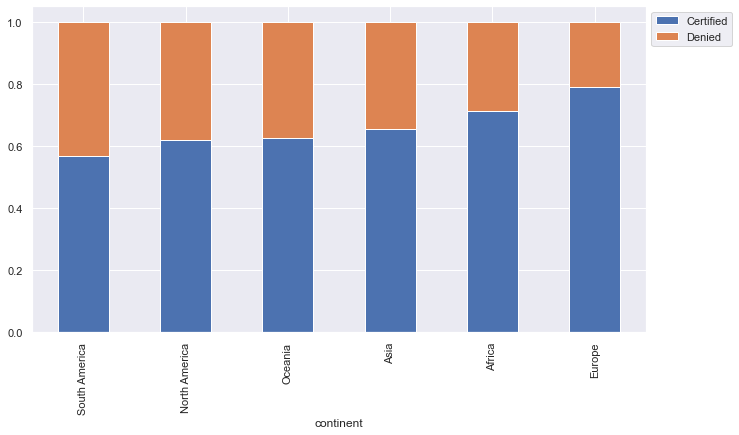

<IPython.core.display.Javascript object>

In [210]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df5, "continent", "case_status")
plt.savefig("continent_status.jpg", bbox_inches="tight")

No change
* Percentages by continent of certified are fairly close, between 50% and 80%
* Asia has the highest amount of applicants by far, and an acceptance of 65%
* Europe has the highest percentage of certified at 79%
* South America has the lowest certified percentage at 58%
* Though Europe doesn't have a high amount of applicants they have the best percentage of Visa approvals

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     15597    7774  23371
N                        5482    4308   9790
Y                       10115    3466  13581
------------------------------------------------------------------------------------------------------------------------


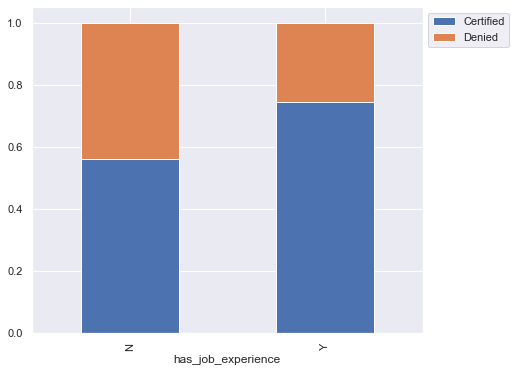

<IPython.core.display.Javascript object>

In [211]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df5, "has_job_experience", "case_status")
plt.savefig("job_exp_status.jpg", bbox_inches="tight")

No Change
* With work experience there is a higher percentage of acceptance 74%
* Without work experience, the certified percentage is 56%; Much lower percentage of Visa's approved without work experience
* Experienced professionals have a better chance of getting the Visa approved

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               15597    7774  23371
Year              14721    6351  21072
Hour                673    1296   1969
Week                155      95    250
Month                48      32     80
------------------------------------------------------------------------------------------------------------------------


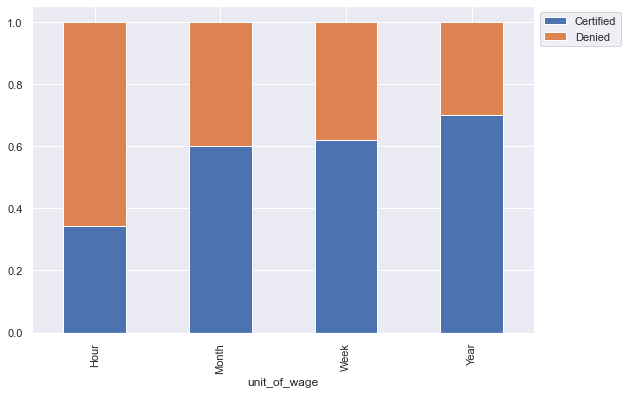

<IPython.core.display.Javascript object>

In [212]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df5, "unit_of_wage", "case_status")
plt.savefig("unit_wage_status.jpg", bbox_inches="tight")

No Change
* Year pay unit is most likely to be certified for a visa, 70% (it's also the highest frequency)
* Hour pay unit is most likely to be denied, 65% denied
* Week and month are both just above 60% on certified

7. Which region do most certified applicants prefer?

case_status           Certified  Denied    All
region_of_employment                          
All                       15597    7774  23371
Northeast                  4128    2450   6578
West                       3752    2285   6037
South                      4507    1937   6444
Midwest                    3017     972   3989
Island                      193     130    323
------------------------------------------------------------------------------------------------------------------------


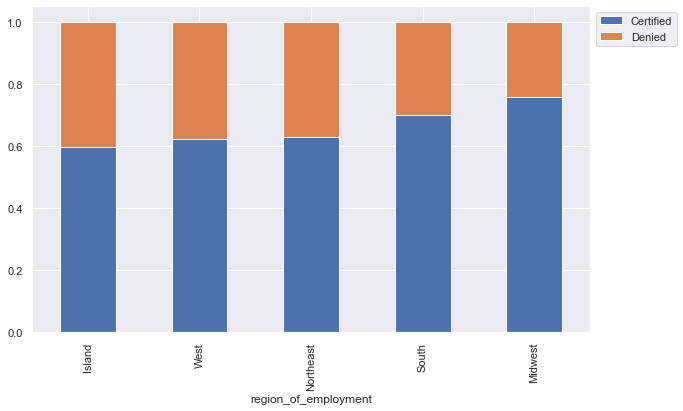

<IPython.core.display.Javascript object>

In [213]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df5, "region_of_employment", "case_status")
plt.savefig("region_status.jpg", bbox_inches="tight")

No Change
* Midwest has the highest percentage of approved visas, 76%
* The lowest percentage is Island at 60%
* Range between regions is small, 60%-76%

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

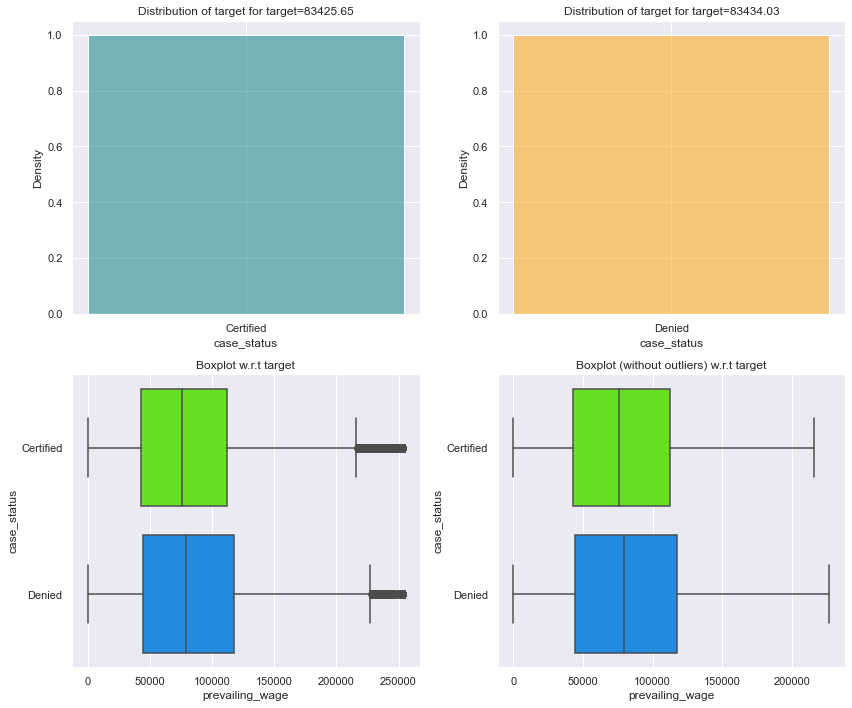

<IPython.core.display.Javascript object>

In [122]:
distribution_plot_wrt_target(df5, "case_status", "prevailing_wage")

Changed
* The density plots don't offer info BUT the boxplots do
* NOW It appears certified wages have a smaller range compared to denied and Lower max pay (just slightly)

In [123]:
# Check averages of each market
markets = (
    df5.groupby(by=["case_status"])["prevailing_wage"].mean().to_frame().reset_index()
)
markets.sort_values(by="prevailing_wage")

,case_status,prevailing_wage
0,Certified,81933.412437
1,Denied,86139.661416


<IPython.core.display.Javascript object>

Changed:
* Old - The overall average of ceritifed is higher by almost 10000
* Now Denied average is higher by 5000

In [124]:
# Create a subset of only the Certified type
df5_Certified = df5[df5.case_status == "Certified"]
df5_Certified.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,N,2412.0,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,N,1082.0,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,N,2339.0,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985.0,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,N,4810.0,2012,Midwest,74362.19,Year,Y,Certified


<IPython.core.display.Javascript object>

In [125]:
# Create a subset of only the Certified type
df5_Denied = df5[df5.case_status == "Denied"]
df5_Denied.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
3,Asia,Bachelor's,N,N,98.0,1897,West,83434.030000,Year,Y,Denied
7,North America,Bachelor's,Y,N,3035.0,1924,West,109038.573192,Hour,Y,Denied
11,Asia,High School,Y,N,4069.0,2005,Northeast,70813.090000,Year,Y,Denied
15,Asia,High School,Y,N,4897.0,1987,West,74108.020000,Year,Y,Denied
20,Asia,Master's,N,N,880.0,2008,West,71128.980000,Year,Y,Denied


<IPython.core.display.Javascript object>

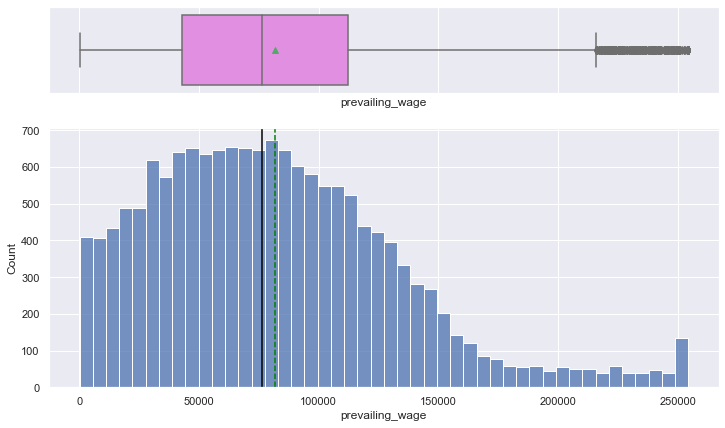

<IPython.core.display.Javascript object>

In [126]:
# Visualize the variable
histogram_boxplot(df5_Certified, "prevailing_wage")

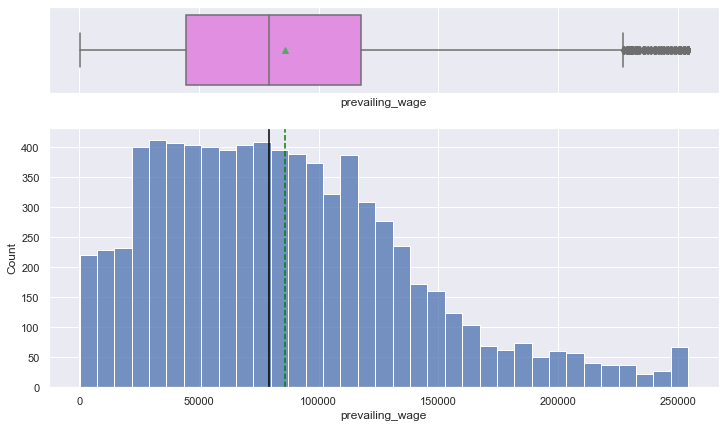

<IPython.core.display.Javascript object>

In [127]:
# Visualize the variable
histogram_boxplot(df5_Denied, "prevailing_wage")

* Distributions are similar between certified and denied
* NO LONGER the case (There is a higher count in the lowest bin for denied (by ~500))
* The middle wages are higher counts in certified
* The high wages counts are higher in certified
* Higher counts in the certified group NOW in the lowest ranges and a gradual incline towards mean/median
* Denied has a jump in counts from the lower wages around 25000

6. Do longer established companies have people being certified more compared to newer established companies?

In [128]:
df6 = df5_Certified.groupby("yr_of_estab")["case_status"].value_counts()
df6.head()

yr_of_estab  case_status
1851         Certified      14
1852         Certified      12
1853         Certified      19
1854         Certified      18
1855         Certified      74
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='yr_of_estab,case_status'>

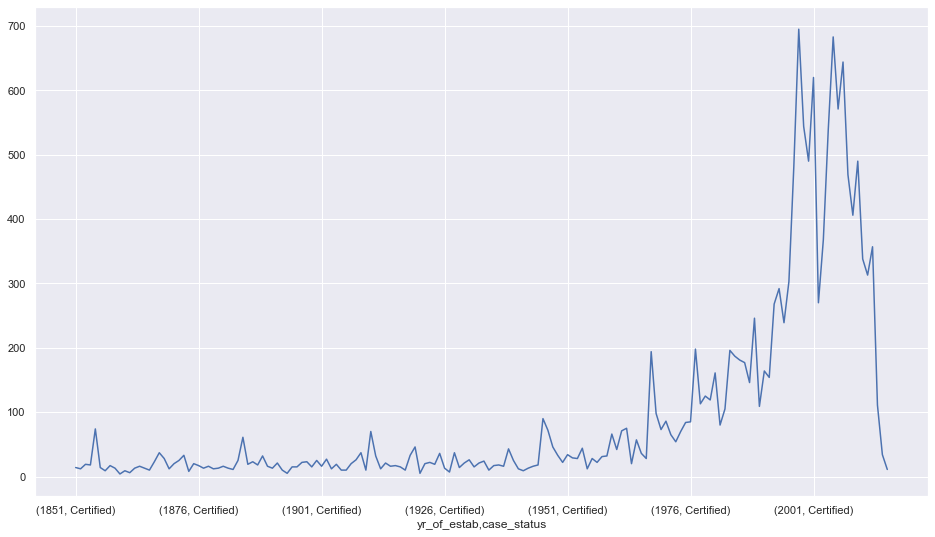

<IPython.core.display.Javascript object>

In [129]:
df6.plot.line()

In [130]:
df7 = df5_Denied.groupby("yr_of_estab")["case_status"].value_counts()
df7.head()

yr_of_estab  case_status
1851         Denied         10
1852         Denied          6
1853         Denied         10
1854         Denied          7
1855         Denied         39
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='yr_of_estab,case_status'>

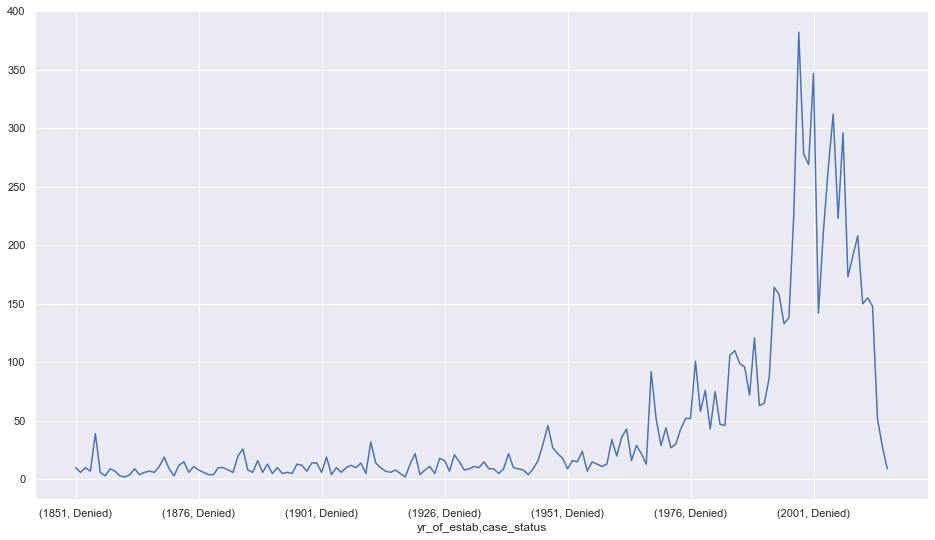

<IPython.core.display.Javascript object>

In [131]:
df7.plot.line()

No Change
* Companies established before 1970 have fewer than 50 applicants denied and fewer than 100 applicants approved
* Both denied and approved applicants have the highest frequencies after 1995
* Newer established companies have higher applicants certified vs older est companies
* But new established companies also have a higher amount of denied versus old est companies

8. Does prevailing wage differ based on region of employment? 

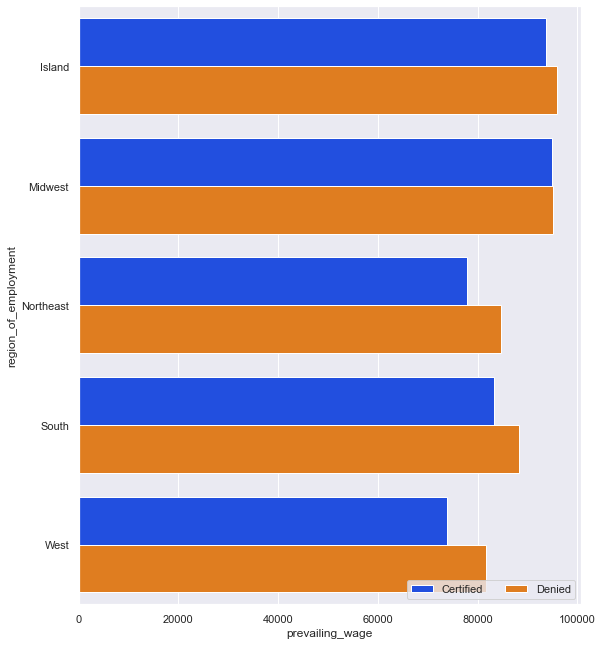

<IPython.core.display.Javascript object>

In [132]:
# Display stacked barplot to visual region vs prevailing wages
plt.figure(figsize=(9, 11))  # To resize the plot

# Plot total production per state
sns.barplot(
    x="prevailing_wage",
    y="region_of_employment",
    data=df5.sort_values("prevailing_wage", ascending=False),
    # label="Prevailing Wage",
    hue="case_status",
    palette="bright",
    # color="b",
    ci=None,
)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()


* Higher wages are seen in Island and Midwest regions (exceeding 90000)
* Northeast has the lowest, peaking at ~68000
* Denied prevailing wage higher in each region (slightly)

9. How does the job experience vary across different continents? Need for job training?

has_job_experience     N      Y    All
continent                             
All                 9790  13581  23371
Asia                6521   9019  15540
Europe              1424   1974   3398
North America       1211   1770   2981
South America        350    420    770
Africa               203    302    505
Oceania               81     96    177
------------------------------------------------------------------------------------------------------------------------


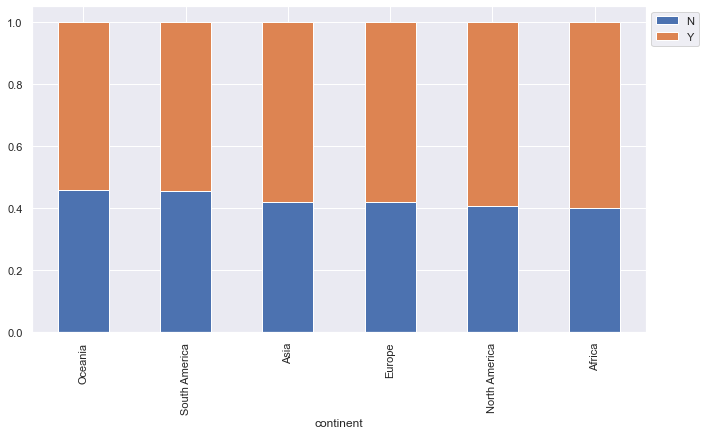

<IPython.core.display.Javascript object>

In [133]:
# Display stacked barplot to visual case status vs continent with counts
stacked_barplot(df5, "continent", "has_job_experience")
#plt.savefig("YrEstBar.jpg", bbox_inches="tight")

* Wow, normalized job experience is nearly equal across the continents
* Africa has the highest percentage of job experience at 60%
* Oceania has the lowest percentage of job experience at 54%
* Across each continent, over half of the applicants have job experience

requires_job_training      N     Y    All
continent                                
All                    20691  2680  23371
Asia                   13958  1582  15540
Europe                  2728   670   3398
North America           2754   227   2981
South America            633   137    770
Africa                   469    36    505
Oceania                  149    28    177
------------------------------------------------------------------------------------------------------------------------


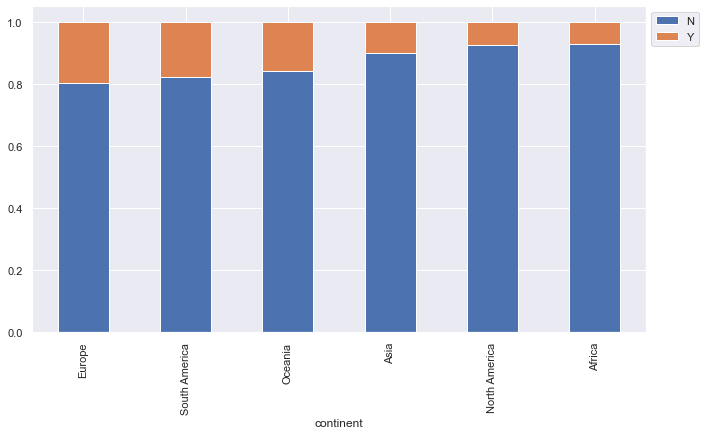

<IPython.core.display.Javascript object>

In [134]:
# Display stacked barplot to visual case status vs continent with counts
stacked_barplot(df5, "continent", "requires_job_training")

* Very small percentage overall requires job training in the total applicants, 12%
* Africa applicants have the highest percentage of not needing training at 93%
* Europe has the lowest ranked percentage of not needing training at 80%, so 20% need training
* Small range across all continents in reference to not needing training for applicants

10. How does the education vary across different continents?

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                          9447       2000         3143      8781  23371
Asia                         6648        853         2114      5925  15540
Europe                       1190        768          443       997   3398
North America                1114        230          367      1270   2981
South America                 304         81          123       262    770
Africa                        129         46           64       266    505
Oceania                        62         22           32        61    177
------------------------------------------------------------------------------------------------------------------------


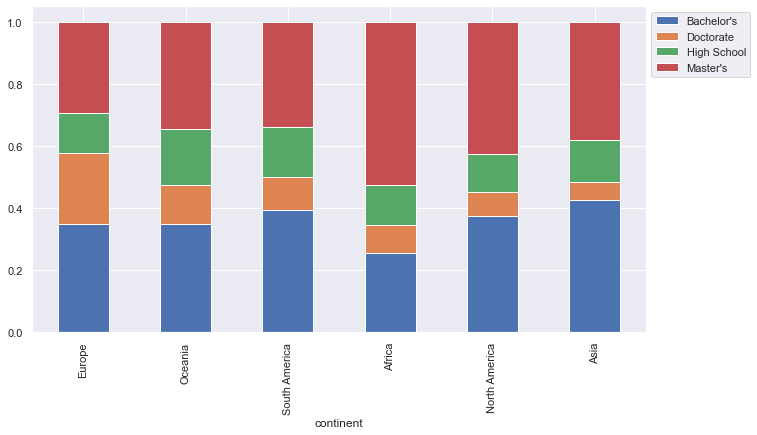

<IPython.core.display.Javascript object>

In [135]:
# Display stacked barplot to visual case status vs continent with counts
stacked_barplot(df5, "continent", "education_of_employee")

* Asia has the highest number of Doctorate degrees in applicants but normalized Europe has the highest percentage of Doctorate degrees at 23% and Asia the smallest percentage 5%
* Africa has the highest percentage of Masters degrees, 52%, and Europe the lowest, 29%
* Asia has the highest percentage of Bachelor degrees, 43%, and Africa the lowest, 26%
* Oceania has the highest percentage of high school degrees, 18%, and Africa the lowest, 13%

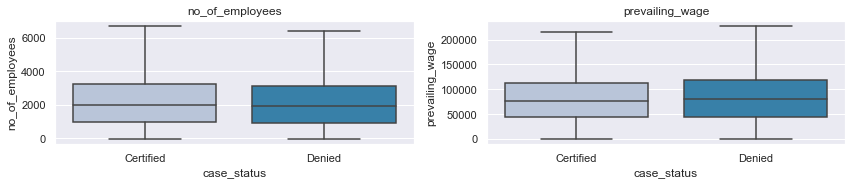

<IPython.core.display.Javascript object>

In [195]:
cols = df5[["no_of_employees", "prevailing_wage"]].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df5["case_status"], df5[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Wanted to do a quick look at the numerical features versus status with the data processing done
* Looks like ranges for Certified and Denied are now very similar between status

## Data Prep for Model

* First break out the dependent variable (set up X and y)
* Then do the one hot encoding on categorical variables
* Split the data into train and test

In [136]:
# Set up X with all the data minus the value to predict and make that y
X = df5.drop(["case_status"], axis=1)
y = df5["case_status"]

print(X.head())
print(y.head())

  continent education_of_employee has_job_experience requires_job_training  \
1      Asia              Master's                  Y                     N   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   
5      Asia              Master's                  Y                     N   
6      Asia            Bachelor's                  N                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
1           2412.0         2002            Northeast         83425.65   
3             98.0         1897                 West         83434.03   
4           1082.0         2005                South        149907.39   
5           2339.0         2012                South         78252.14   
6           4985.0         1994                South         53635.39   

  unit_of_wage full_time_position  
1         Year                  Y  
3         Year      

<IPython.core.display.Javascript object>

In [137]:
# Now to one hot encode the categorical variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
# adding constant
X = sm.add_constant(X)

X.head()

,const,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
1,1.0,2412.0,2002,83425.65,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
3,1.0,98.0,1897,83434.03,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1.0,1082.0,2005,149907.39,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
5,1.0,2339.0,2012,78252.14,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
6,1.0,4985.0,1994,53635.39,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

In [138]:
# Now to one hot encode the categorical variables; don't want to drop first because it's the variable we are trying to predict
y = pd.get_dummies(
    y,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=False,
)
y.head()

,Certified,Denied
1,1,0
3,0,1
4,1,0
5,1,0
6,1,0


<IPython.core.display.Javascript object>

In [139]:
# Now to drop the Denied from y as we are concerned with predicting Certified Visas
y = y["Certified"]
y.head()

1    1
3    0
4    1
5    1
6    1
Name: Certified, dtype: uint8

<IPython.core.display.Javascript object>

In [140]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [141]:
# Check the split
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 16359
Number of rows in test data = 7012


<IPython.core.display.Javascript object>

* Looks good...Ready to build

## Building bagging and boosting models

### Model evaluation criterion

What does OFLC want? A quick profile/method to certify Visas


### Model can make wrong predictions as:

1. Predicting an applicant will qualify for a Visa but in reality the applicant is denied - Increase of resources | Increase of time spent reviewing the candidate case voids the point of the shortlist profile

2. Predicting an applicant will not qualify for a Visa but in reality the applicant is certified. - Loss of opportunity to shortlist candidate | case will have to be reviewed per regular policy

### Which case is more important? 

* Predicting an applicant being certified that gets certified.  Goal is to facilitate visa approvals and be able to create a shortlist.  False positives (or Type 1) may be more detrimental to OFLC.  It's questionable though as both are important to predict a shortlist to save valuable time (meaning denied and certified being correctly predicted)

### How to reduce this loss i.e need to reduce False Positives (and False Negatives)?
*  `precision` should be maximized, the greater the precision higher the chances of minimizing the false positives.
and
* 'f1 score' is a measure that takes into account precision and recall; therefore, it takes into account false negatives and positives; should seek to maximize

### Bagging Models

1. Decision Tree
2. Bagging Classifier
3. Random Forest

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [142]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(x_train, y_train))
        print("Accuracy on test set : ", model.score(x_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
        print("F1 on training set : ", metrics.f1_score(y_train, pred_train))
        print("F1 on test set : ", metrics.f1_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [143]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [144]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [145]:
# Using above defined function to get accuracy, recall, precision, and f1 on train and test set
dTree_score = get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.659155733029093
Recall on training set :  1.0
Recall on test set :  0.7480769230769231
Precision on training set :  1.0
Precision on test set :  0.7429966044142614
F1 on training set :  1.0
F1 on test set :  0.7455281090289607


<IPython.core.display.Javascript object>

* Training set metrics are all 1, anticipated for a fully grown decision tree | Overfitting!
* The rest of the metrics on test data all set around 74%, not the best values
* Accuracy was the lowest on the test data at 66%

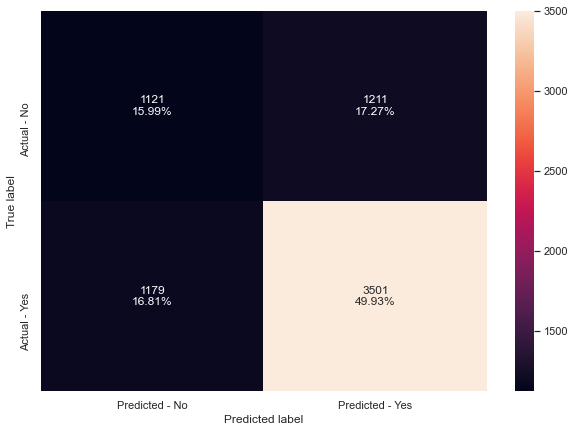

<IPython.core.display.Javascript object>

In [146]:
# Get confusion matrix
make_confusion_matrix(dTree, y_test)

### Confusion matrix results
* True Positives (TP): predicted 49.5% would be certified and they did get certified
* True Negatives (TN): predicted 16.4% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 16.8% would be certifed and they were not certified  
* False Negatives (FN): predicted 17.3% would be denied and they were certified

Not the best results overall for the test data

### Bagging Classifier

In [147]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(x_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [148]:
# Using defined function to get accuracy, recall, f1 and precision on train and test set
bagging_estimator_score = get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9850846628767039
Accuracy on test set :  0.7009412435824302
Recall on training set :  0.9858019602454887
Recall on test set :  0.7735042735042735
Precision on training set :  0.9917979909685744
Precision on test set :  0.7773244578054541
F1 on training set :  0.9887908857037853
F1 on test set :  0.7754096604905216


<IPython.core.display.Javascript object>

* Training data nearly perfect at 98 to 99% | Overfitting
* Test data slightly better at 77% for recall, precision, and f1; still not the best
* Also test data slightly better at 70% for accuracy

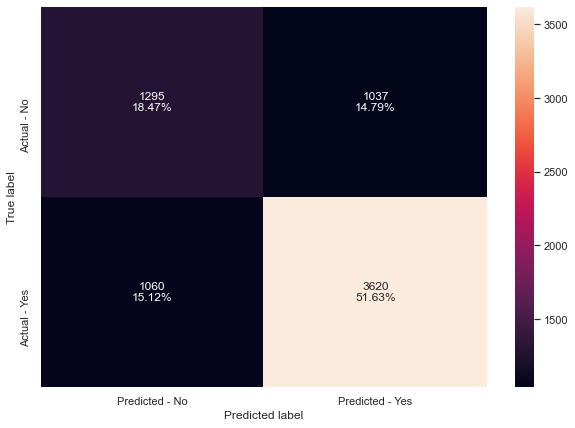

<IPython.core.display.Javascript object>

In [149]:
# Get confusion matrix
make_confusion_matrix(bagging_estimator, y_test)

### Confusion matrix results
* True Positives (TP): predicted 51.9% would be certified and they did get certified
* True Negatives (TN): predicted 17.8% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 15.4% would be certifed and they were not certified  
* False Negatives (FN): predicted 14.9% would be denied and they were certified

Slightly better (~1%) on test data with default bagging

### Random Forest

In [150]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [151]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.7211922418710781
Recall on training set :  1.0
Recall on test set :  0.8341880341880342
Precision on training set :  1.0
Precision on test set :  0.7680503639582923
F1 on training set :  1.0
F1 on test set :  0.7997541739219503


<IPython.core.display.Javascript object>

* Training data is at 1.0 for all metrics | Overfitting!
* Seeing improvement in F1 and Recall; reached 80%
* Still 77% on precision 
* Accuracy improved as well to 73%

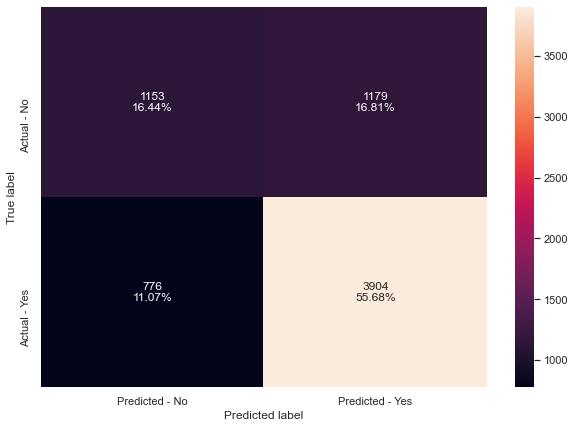

<IPython.core.display.Javascript object>

In [152]:
# Get confusion matrix
make_confusion_matrix(rf_estimator, y_test)

### Confusion matrix results
* True Positives (TP): predicted 55.8% would be certified and they did get certified
* True Negatives (TN): predicted 16.9% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 16.3% would be certifed and they were not certified  
* False Negatives (FN): predicted 11.1% would be denied and they were certified

Slightly better on TP and FN

### Boosting Models

1. Adaboost
2. GradientBoost
3. XGBoost (optional)

### Adaboost

In [153]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [154]:
# Using above defined function to get accuracy, f1, recall and precision on train and test set
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.7384925728956537
Accuracy on test set :  0.7341699942954935
Recall on training set :  0.885591279655583
Recall on test set :  0.8822649572649572
Precision on training set :  0.7614397101677561
Precision on test set :  0.7587284086732818
F1 on training set :  0.8188362835605997
F1 on test set :  0.8158466706184547


<IPython.core.display.Javascript object>

* Training and testing metrics are nearly the same, model did not overfit
* The highest score is on recall at 88%, pretty good
* Then F1 is at 82%
* Precision only at 76%
* Accuracy at 74%

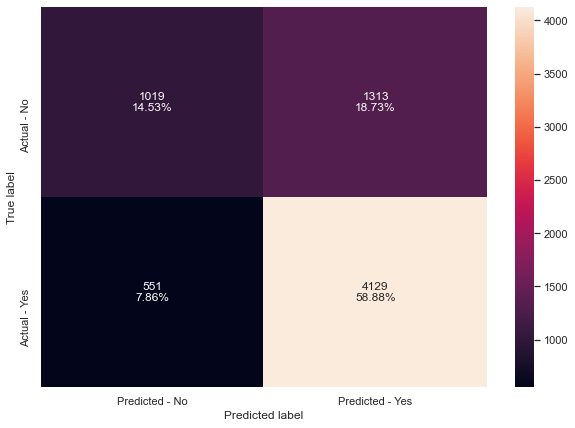

<IPython.core.display.Javascript object>

In [155]:
# Get confusion matrix
make_confusion_matrix(abc, y_test)

### Confusion matrix results
* True Positives (TP): predicted 59.1% would be certified and they did get certified
* True Negatives (TN): predicted 14.6% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 18.5% would be certifed and they were not certified  
* False Negatives (FN): predicted 7.7% would be denied and they were certified

More TP predicted, and in same region for TN; Low FN but higher FP

### GradientBoost

In [156]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [157]:
# Using above defined function to get accuracy, f1, recall and precision on train and test set
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.7557307903906106
Accuracy on test set :  0.746434683399886
Recall on training set :  0.8761564532380691
Recall on test set :  0.8670940170940171
Precision on training set :  0.7834384470472602
Precision on test set :  0.778289221327196
F1 on training set :  0.8272074721093143
F1 on test set :  0.8202951283606226


<IPython.core.display.Javascript object>

* Training and test metrics match, not overfitting
* Recall is highest at 87% with F1 next at 82%
* Precision is at 78% and accuracy at 75%
* Similar results to adaboost

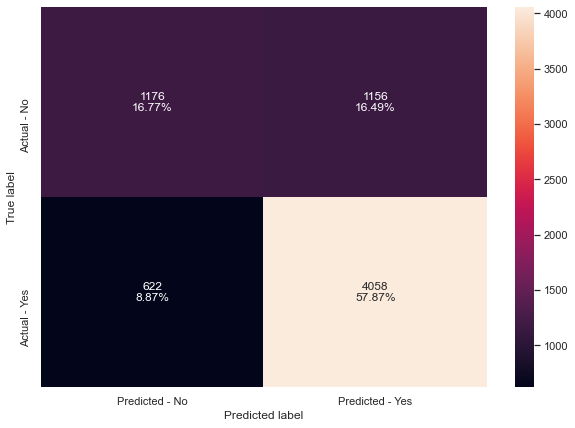

<IPython.core.display.Javascript object>

In [158]:
# Get confusion matrix
make_confusion_matrix(gbc, y_test)

### Confusion matrix results
* True Positives (TP): predicted 57.9% would be certified and they did get certified
* True Negatives (TN): predicted 17.2% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 16.0% would be certifed and they were not certified  
* False Negatives (FN): predicted 8.9% would be denied and they were certified

Very close results to Adaboost

### XGBoost (optional)

In [159]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(x_train, y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

<IPython.core.display.Javascript object>

In [160]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_score = get_metrics_score(xgb)

Accuracy on training set :  0.7549361207897793
Accuracy on test set :  0.7458642327438677
Recall on training set :  0.8777136575982413
Recall on test set :  0.8694444444444445
Precision on training set :  0.7818211488250653
Precision on test set :  0.7765267175572519
F1 on training set :  0.8269969360894144
F1 on test set :  0.8203629032258064


<IPython.core.display.Javascript object>

* Training and test data have matching metrics
* Recall and F1 the highest, at 87% and 83% respectively
* Precision and Accuracy both in the high 70 percentage

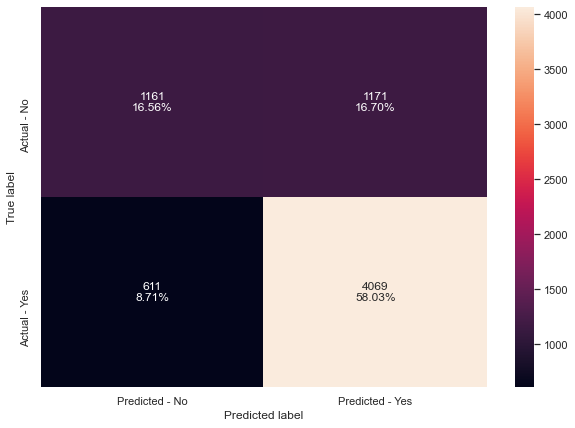

<IPython.core.display.Javascript object>

In [161]:
# Get confusion matrix
make_confusion_matrix(xgb, y_test)

### Confusion matrix results
* True Positives (TP): predicted 58.1% would be certified and they did get certified
* True Negatives (TN): predicted 16.9% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 16.2% would be certifed and they were not certified  
* False Negatives (FN): predicted 8.7% would be denied and they were certified

Very close results to Adaboost and GradientBoost

### Comparing all models till now

In [184]:
# defining list of models
models = [dTree, bagging_estimator, rf_estimator, abc, gbc, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))
    f1_train.append(np.round(j[6], 2))
    f1_test.append(np.round(j[7], 2))

<IPython.core.display.Javascript object>

In [185]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree classifier with default parameters",
            "Bagging Classifier with default parameters",
            "Random Forest with default parameters",
            "AdaBoost with default parameters",
            "GradientBoost with default parameters",
            "XGBoost with default parameters",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
    }
)
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree classifier with default parameters,1.00,0.66,1.00,0.75,1.00,0.74,1.00,0.75
1,Bagging Classifier with default parameters,0.99,0.70,0.99,0.77,0.99,0.78,0.99,0.78
2,Random Forest with default parameters,1.00,0.72,1.00,0.83,1.00,0.77,1.00,0.80
3,AdaBoost with default parameters,0.74,0.73,0.89,0.88,0.76,0.76,0.82,0.82
4,GradientBoost with default parameters,0.76,0.75,0.88,0.87,0.78,0.78,0.83,0.82
5,XGBoost with default parameters,0.75,0.75,0.88,0.87,0.78,0.78,0.83,0.82


<IPython.core.display.Javascript object>

* The first 3 models were overfitting but Random Forest performed the best out of the overfit models
* The Boosting models did not overfit
* XGBoost did the best out of the models, it has a higher F1, a higher Precision, and  a higher Recall

Though Recall the highest metric is at 87% and the others that are important for the study (Precision, F1) are only at 78% and 82%

##  Will tuning the hyperparameters improve the model performance?

### Bagging Models - Tuned

1. Decision Tree
2. Bagging Classifier
3. Random Forest

### Decision Tree Tuned

In [164]:
# Choose the type of classifier.
dTree_tuned = DecisionTreeClassifier(criterion="gini", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(2, 20)) + [None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.001, 0.01, 0.1, 0.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)

<IPython.core.display.Javascript object>

In [189]:
# Using above defined function to get accuracy, recall, precision, and f1 on train and test set
dTree_tuned_score = get_metrics_score(dtree_tuned)

Accuracy on training set :  0.737208875848157
Accuracy on test set :  0.7290359383913292
Recall on training set :  0.9127049555738757
Recall on test set :  0.9049145299145299
Precision on training set :  0.748610067618332
Precision on test set :  0.7442882249560633
F1 on training set :  0.822553349568663
F1 on test set :  0.8167791706846673


<IPython.core.display.Javascript object>

* Not overfitting
* Recall is high at 90%
* F1 is still at 82%, and Precision at 75%
* Accuracy still sitting at 73%

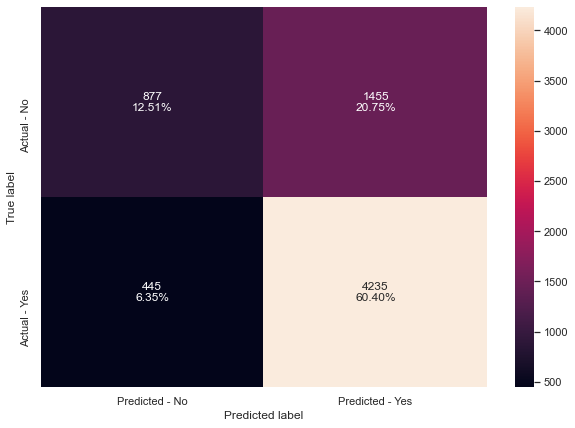

<IPython.core.display.Javascript object>

In [166]:
# Get confusion matrix
make_confusion_matrix(dtree_tuned, y_test)

### Confusion matrix results
* True Positives (TP): predicted 60.6% would be certified and they did get certified
* True Negatives (TN): predicted 13.1% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 20.1% would be certifed and they were not certified  
* False Negatives (FN): predicted 6.2% would be denied and they were certified

High true positive but also high FP
Very low FN

### Bagging Classifier Tuned

In [187]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=40,
                  random_state=1)

<IPython.core.display.Javascript object>

In [188]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score = get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9970047068891742
Accuracy on test set :  0.7293211637193383
Recall on training set :  0.9999083997435193
Recall on test set :  0.8816239316239316
Precision on training set :  0.9956220357533747
Precision on test set :  0.7542961608775137
F1 on training set :  0.9977606142315251
F1 on test set :  0.8130049261083744


<IPython.core.display.Javascript object>

* Training set is at 99% and test metric is not | Overfitting in the tuned data
* Recall score is good at 88% and F1 is up to 81%
* Precision and Accuracy are at 76% and 73%

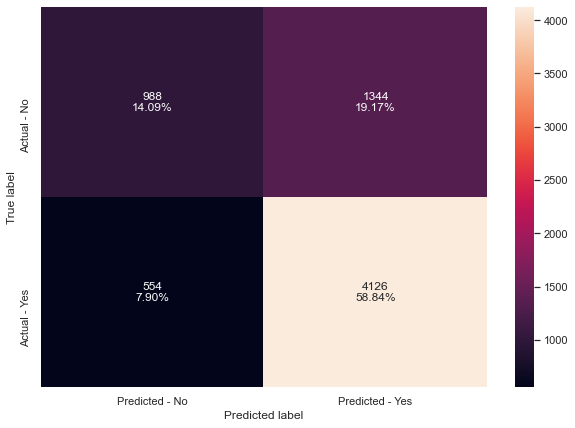

<IPython.core.display.Javascript object>

In [169]:
# Get confusion matrix
make_confusion_matrix(bagging_estimator_tuned, y_test)

### Confusion matrix results
* True Positives (TP): predicted 59.1% would be certified and they did get certified
* True Negatives (TN): predicted 14.1% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 19.1% would be certifed and they were not certified  
* False Negatives (FN): predicted 7.8% would be denied and they were certified

### Random Forest Tuned

In [170]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.30000000000000004, max_samples=0.4,
                       min_samples_leaf=9, n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

In [171]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score = get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.7676508344030809
Accuracy on test set :  0.7445807187678266
Recall on training set :  0.8845836768342952
Recall on test set :  0.864957264957265
Precision on training set :  0.7916871618298081
Precision on test set :  0.7774150182446706
F1 on training set :  0.8355613238157041
F1 on test set :  0.818853039344594


<IPython.core.display.Javascript object>

* Similar results between training and testing, do not believe the model is overfitting
* All the metric scores seem a small amount higher compared to previous model runs
* Recall at 88% and F1 up to 83%
* Precision at 79% and accuracy up to 75%

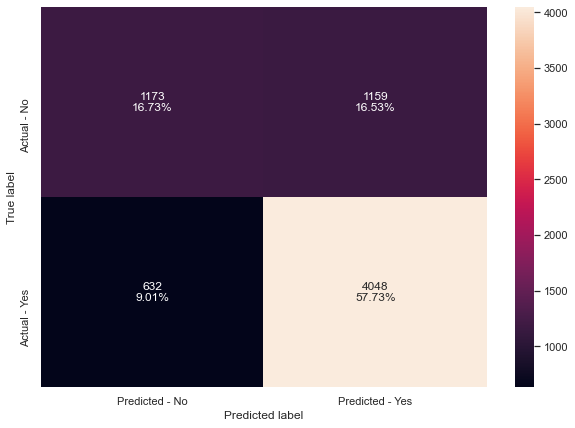

<IPython.core.display.Javascript object>

In [172]:
# Get confusion matrix
make_confusion_matrix(rf_estimator_tuned, y_test)

### Confusion matrix results
* True Positives (TP): predicted 58.6% would be certified and they did get certified
* True Negatives (TN): predicted 16.71% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 16.5% would be certifed and they were not certified  
* False Negatives (FN): predicted 8.2% would be denied and they were certified
    
This is one of the better model run results

### Boosting Models - Tuned

1. Adaboost
2. GradientBoost
3. XGBoost (optional)

### Adaboost Tuned

In [173]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=20, random_state=1)

<IPython.core.display.Javascript object>

In [186]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.7475395806589645
Accuracy on test set :  0.7418710781517399
Recall on training set :  0.8902628927360997
Recall on test set :  0.8873931623931623
Precision on training set :  0.7682396648486286
Precision on test set :  0.763980868285504
F1 on training set :  0.8247623896809233
F1 on test set :  0.821075523922499


<IPython.core.display.Javascript object>

* Slightly decrease in overall metric results compared to the tuned random forest
* All metrics are matching between training and test, not overfitting

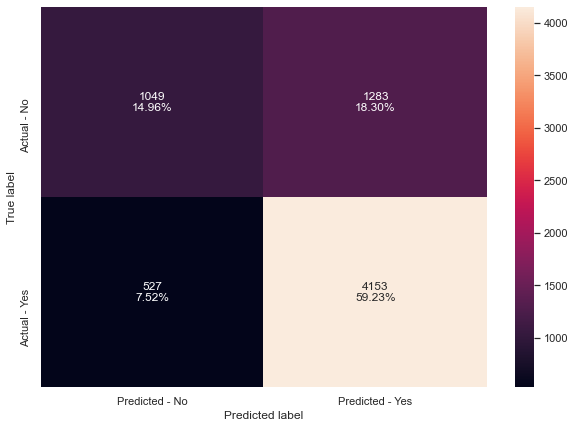

<IPython.core.display.Javascript object>

In [175]:
# Get confusion matrix
make_confusion_matrix(abc_tuned, y_test)

### Confusion matrix results
* True Positives (TP): predicted 59.4% would be certified and they did get certified
* True Negatives (TN): predicted 15.2% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 18.0% would be certifed and they were not certified  
* False Negatives (FN): predicted 7.4% would be denied and they were certified


### GradientBoost Tuned

In [176]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

In [191]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7544470933431139
Accuracy on test set :  0.7448659440958357
Recall on training set :  0.874232847851974
Recall on test set :  0.8660256410256411
Precision on training set :  0.7830653101411225
Precision on test set :  0.7771812080536913
F1 on training set :  0.8261415278078339
F1 on test set :  0.8192016169782719


<IPython.core.display.Javascript object>

* Train and test metrics are similar, not overfitting
* Not noticing much improvement with the tuning

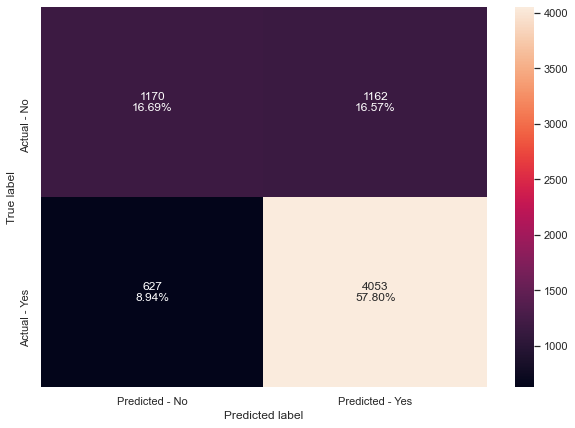

<IPython.core.display.Javascript object>

In [178]:
# Get confusion matrix
make_confusion_matrix(gbc_tuned, y_test)

### Confusion matrix results
* True Positives (TP): predicted 57.9% would be certified and they did get certified
* True Negatives (TN): predicted 17.3% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 15.8% would be certifed and they were not certified  
* False Negatives (FN): predicted 8.9% would be denied and they were certified

Slightly More distributed results with this tuned model

### XGBoost Tuned

In [179]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.5,
              eval_metric='logloss', gamma=3, learning_rate=0.05,
              n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [180]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.7466226541964668
Accuracy on test set :  0.7394466628636623
Recall on training set :  0.9017129247961895
Recall on test set :  0.897008547008547
Precision on training set :  0.7621554660885723
Precision on test set :  0.7573516146491069
F1 on training set :  0.8260814836571141
F1 on test set :  0.8212853369852294


<IPython.core.display.Javascript object>

* Not seeing a significant change based on previous model runs

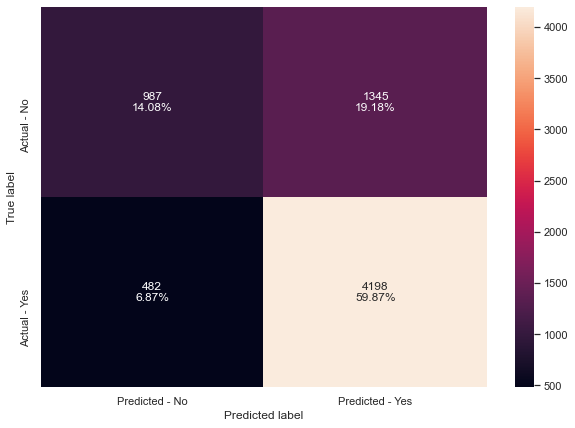

<IPython.core.display.Javascript object>

In [181]:
# Get confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

### Confusion matrix results
* True Positives (TP): predicted 59.9% would be certified and they did get certified
* True Negatives (TN): predicted 14.1% would be denied and they were denied (not good prediction)
#### Key metric(s):  
* False Postives (FP): predicted 19.2% would be certifed and they were not certified  
* False Negatives (FN): predicted 6.9% would be denied and they were certified


## Model Performance Comparison and Conclusions

In [192]:
# defining list of models
models = [
    dTree,
    bagging_estimator,
    rf_estimator,
    abc,
    gbc,
    xgb,
    dtree_tuned,
    bagging_estimator_tuned,
    rf_estimator_tuned,
    abc_tuned,
    gbc_tuned,
    xgb_tuned,
]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))
    f1_train.append(np.round(j[6], 2))
    f1_test.append(np.round(j[7], 2))

<IPython.core.display.Javascript object>

In [193]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree classifier with default parameters",
            "Bagging Classifier with default parameters",
            "Random Forest with default parameters",
            "AdaBoost with default parameters",
            "GradientBoost with default parameters",
            "XGBoost with default parameters",
            "Decision Tree - Tuned",
            "Bagging Classifier - Tuned",
            "Random Forest  - Tuned",
            "AdaBoost - Tuned",
            "GradientBoost  - Tuned",
            "XGBoost - Tuned",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
    }
)
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree classifier with default parameters,1.00,0.66,1.00,0.75,1.00,0.74,1.00,0.75
1,Bagging Classifier with default parameters,0.99,0.70,0.99,0.77,0.99,0.78,0.99,0.78
2,Random Forest with default parameters,1.00,0.72,1.00,0.83,1.00,0.77,1.00,0.80
3,AdaBoost with default parameters,0.74,0.73,0.89,0.88,0.76,0.76,0.82,0.82
4,GradientBoost with default parameters,0.76,0.75,0.88,0.87,0.78,0.78,0.83,0.82
5,XGBoost with default parameters,0.75,0.75,0.88,0.87,0.78,0.78,0.83,0.82
6,Decision Tree - Tuned,0.74,0.73,0.91,0.90,0.75,0.74,0.82,0.82
7,Bagging Classifier - Tuned,1.00,0.73,1.00,0.88,1.00,0.75,1.00,0.81
8,Random Forest - Tuned,0.77,0.74,0.88,0.86,0.79,0.78,0.84,0.82
9,AdaBoost - Tuned,0.75,0.74,0.89,0.89,0.77,0.76,0.82,0.82


<IPython.core.display.Javascript object>

* Highest F1 value is .82
* Highest Precision is .78
* Highest Recall is 0.9
* Highest Accuracy is 0.75
* XGBoost Tuned has highest Recall and highest F1 (slightly lower precision, 0.76)
* AdaBoost Tuned has 0.89 Recall and .82 F1 with .76 Precision
* GradientBoost Tuned & XGBoost default & GradientBoost are the models with combo of highest F1/Precision, their Recall is slightly lower with 0.87 (rather than 0.9)

* Overall none of the models made it over 82% in F1 and over 78% with Precision (would've like them to hit a higher percentage)

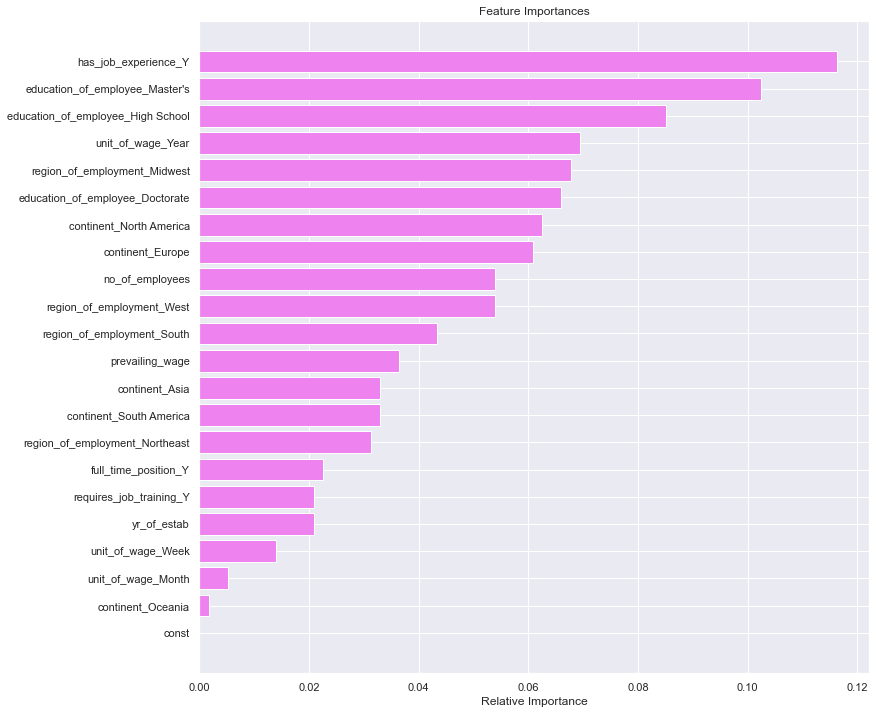

<IPython.core.display.Javascript object>

In [194]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Top feature, has job experience Y
* Then has Master's degree
* High school education
* Unit of wage, year
* Midwest
* Doctorate

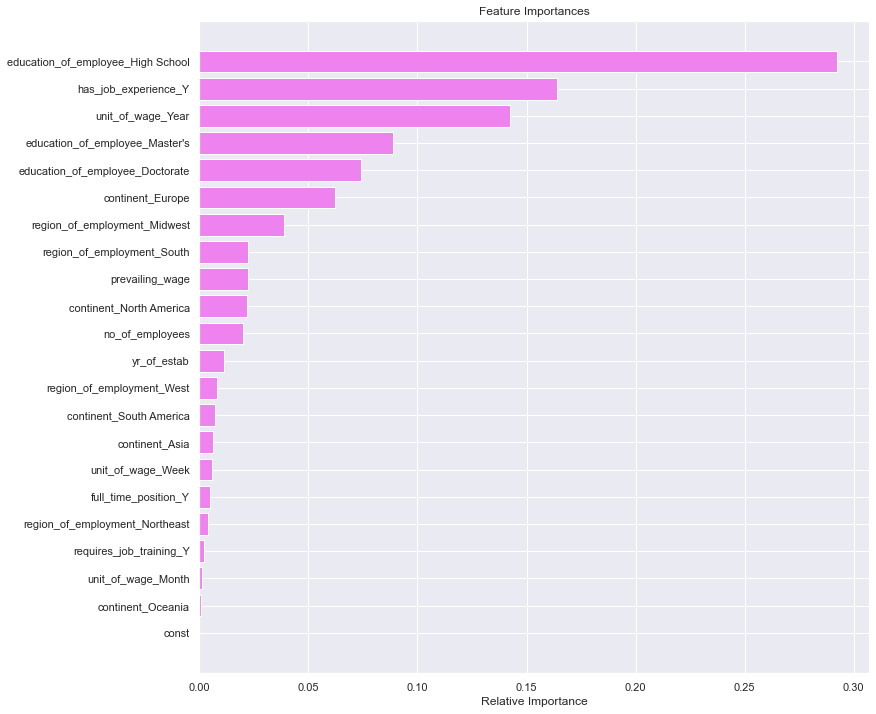

<IPython.core.display.Javascript object>

In [197]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Top feature, high school education
* Next has job experience Y
* Unit of wage year
* Master's then doctor's degrees
* Europe
* Midwest

## Actionable Insights and Recommendations

### Questions to be answered:
1. Which features have a high influence on certified (build a profile on results from ML based solution)
2. Build a profile on results from ML based solution for certified and denied applicants

### Top Features
* Has Job Experience (Y)
* Education, high school
* Unit of wage year
* Education, Master's degree
* Midwest region
* Europe continent
* Education, Doctor's degree

### Profiles for Certified/Denied

* Certified:
    * Doctorate
    * Masters
    * Europe
    * Work Experience yes
    * Year wage unit
    * Midwest

* Denied:
    * High School education
    * No Work Experience
    * Hour pay unit

These profiles were proposed after summarizing EDA.  I think they hold true after the ML models identified the most important features

Recomment establishing the profile guidelines to Certify/Deny initially
But note there is some error of ~20% or less based on the ML
80% of applicants can be quickly processed following the profiles